In [2]:
# Specify where you want to save your results to
out_dir = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/resources/published_networks/Cognitive_Networks/Queensland Cognition Maps/excluded_letter_fluency'

# Generate FWE Corrected R-Squared Map 
- Using maximum statistic correction
- Notes on controlling a regression:
    - Adding covariates to a regression will 'control' for them, but will almost always increase the R-squared. 
    - To 'remove' a covariate from the regression, you will want to regress a nuisance covariate OUT of the covariate of interest. 
        - This means your regressor will become the residuals from the regression of cov_1 ~ nuisance_cov1

Import Niftis
- These are EXPECTED to have subject IDs which are IDENTICAL to the subject IDs that go in the covarite DF column names below
- Column labels are subject IDs. 
- This is expected to ultimately have the form:

|        |  1 |  2 |  3 |  4 |  5 |  6 |  7 |  8 |  9 |  10 | ... |  40 |  41 |  42 |  43 |  45 |  46 |  47 |  48 |  49 |  50 |
|----------|------------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|------------|-----|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|
| Voxel 1     | 3          | 4         | 7         | 2         | 2         | 2         | 9         | 4         | 7         | 5          | ... | 5           | 2           | 7           | 7           | 3           | 8           | 8           | 1           | 1           | 3           |
| . . .      | ...         | ...        | ...         | ...         | ...         | ...         | ...         | ...         | ...         | ...          | ... | ...           | ...           | ...           | ...           | ...           | ...           | 7           | ...           | ...           | ...           |
| Voxel N     | 2          | 1         | 0         | 1         | 3         | 4         | 9         | 5         | 8         | 6          | ... | 6           | 3           | 8           | 8           | 4           | 9           | 9           | 2           | 2           | 4           |

In [3]:
import_path = '/Volumes/HowExp/datasets/03e_Queensland_Parkinson_DBS/derivatives/conn'
file_target= '*T*.nii.gz'

In [4]:
from calvin_utils.file_utils.import_functions import GiiNiiFileImport
giinii = GiiNiiFileImport(import_path=import_path, file_column=None, file_pattern=file_target)
nimg_df = giinii.run()
nimg_df

Attempting to import from: /Volumes/HowExp/datasets/03e_Queensland_Parkinson_DBS/derivatives/conn/*T*.nii.gz


Importing niftis: 100%|██████████| 59/59 [00:01<00:00, 31.56it/s]


,/Volumes/HowExp/datasets/03e_Queensland_Parkinson_DBS/derivatives/conn/LeadDBS060_vat_seed_compound_fMRI_func_seed_T.nii.gz,/Volumes/HowExp/datasets/03e_Queensland_Parkinson_DBS/derivatives/conn/LeadDBS058_vat_seed_compound_fMRI_func_seed_T.nii.gz,/Volumes/HowExp/datasets/03e_Queensland_Parkinson_DBS/derivatives/conn/LeadDBS067_vat_seed_compound_fMRI_func_seed_T.nii.gz,/Volumes/HowExp/datasets/03e_Queensland_Parkinson_DBS/derivatives/conn/LeadDBS051_vat_seed_compound_fMRI_func_seed_T.nii.gz,/Volumes/HowExp/datasets/03e_Queensland_Parkinson_DBS/derivatives/conn/LeadDBS069_vat_seed_compound_fMRI_func_seed_T.nii.gz,/Volumes/HowExp/datasets/03e_Queensland_Parkinson_DBS/derivatives/conn/LeadDBS056_vat_seed_compound_fMRI_func_seed_T.nii.gz,/Volumes/HowExp/datasets/03e_Queensland_Parkinson_DBS/derivatives/conn/LeadDBS035_vat_seed_compound_fMRI_func_seed_T.nii.gz,/Volumes/HowExp/datasets/03e_Queensland_Parkinson_DBS/derivatives/conn/LeadDBS068_vat_seed_compound_fMRI_func_seed_T.nii.gz,/Volumes/HowExp/datasets/03e_Queensland_Parkinson_DBS/derivatives/conn/LeadDBS057_vat_seed_compound_fMRI_func_seed_T.nii.gz,/Volumes/HowExp/datasets/03e_Queensland_Parkinson_DBS/derivatives/conn/LeadDBS050_vat_seed_compound_fMRI_func_seed_T.nii.gz,...,/Volumes/HowExp/datasets/03e_Queensland_Parkinson_DBS/derivatives/conn/LeadDBS071_vat_seed_compound_fMRI_func_seed_T.nii.gz,/Volumes/HowExp/datasets/03e_Queensland_Parkinson_DBS/derivatives/conn/LeadDBS070_vat_seed_compound_fMRI_func_seed_T.nii.gz,/Volumes/HowExp/datasets/03e_Queensland_Parkinson_DBS/derivatives/conn/LeadDBS084_vat_seed_compound_fMRI_func_seed_T.nii.gz,/Volumes/HowExp/datasets/03e_Queensland_Parkinson_DBS/derivatives/conn/LeadDBS083_vat_seed_compound_fMRI_func_seed_T.nii.gz,/Volumes/HowExp/datasets/03e_Queensland_Parkinson_DBS/derivatives/conn/LeadDBS077_vat_seed_compound_fMRI_func_seed_T.nii.gz,/Volumes/HowExp/datasets/03e_Queensland_Parkinson_DBS/derivatives/conn/LeadDBS048_vat_seed_compound_fMRI_func_seed_T.nii.gz,/Volumes/HowExp/datasets/03e_Queensland_Parkinson_DBS/derivatives/conn/LeadDBS041_vat_seed_compound_fMRI_func_seed_T.nii.gz,/Volumes/HowExp/datasets/03e_Queensland_Parkinson_DBS/derivatives/conn/LeadDBS046_vat_seed_compound_fMRI_func_seed_T.nii.gz,/Volumes/HowExp/datasets/03e_Queensland_Parkinson_DBS/derivatives/conn/LeadDBS079_vat_seed_compound_fMRI_func_seed_T.nii.gz,/Volumes/HowExp/datasets/03e_Queensland_Parkinson_DBS/derivatives/conn/LeadDBS034_vat_seed_compound_fMRI_func_seed_T.nii.gz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Fix names

In [6]:
pre = '/LeadDBS'
post = '_vat'

In [7]:
nimg_df = GiiNiiFileImport.splice_colnames(nimg_df, pre, post)
nimg_df

,060,058,067,051,069,056,035,068,057,050,...,071,070,084,083,077,048,041,046,079,034
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Import Covariates

**The CSV is expected to be in this format**
- sub column contents MUST match the names of the neuroimaging files above. 
    - ID column 
```
+-----+----------------------------+--------------+--------------+--------------+
| sub | Nifti_File_Path            | Covariate_1  | Covariate_2  | Covariate_3  |
+-----+----------------------------+--------------+--------------+--------------+
| 1   | /path/to/file1.nii.gz      | 0.5          | 1.2          | 3.4          |
| 2   | /path/to/file2.nii.gz      | 0.7          | 1.4          | 3.1          |
| 3   | /path/to/file3.nii.gz      | 0.6          | 1.5          | 3.5          |
| 4   | /path/to/file4.nii.gz      | 0.9          | 1.1          | 3.2          |
| ... | ...                        | ...          | ...          | ...          |
+-----+----------------------------+--------------+--------------+--------------+
```

In [11]:
# Specify the path to your CSV file containing NIFTI paths
input_csv_path = '/Volumes/HowExp/datasets/03e_Queensland_Parkinson_DBS/metadata/queensland_cognition.csv'
sheet= None #'master_list_proper_subjects'

In [12]:
from calvin_utils.permutation_analysis_utils.statsmodels_palm import CalvinStatsmodelsPalm
# Instantiate the PalmPrepararation class
cal_palm = CalvinStatsmodelsPalm(input_csv_path=input_csv_path, output_dir=out_dir, sheet=sheet)
# Call the process_nifti_paths method
data_df = cal_palm.read_and_display_data()
data_df

,Subject,age_at_surgery,Subiculum_T_Connectivity,Z_Scored_Subiculum_T_Connectivity,Subiculum_R_Connectivity,Subiculum_RFz_Connectivity,Pre_MMSE_Total,FU4_MMSE_Total,Percent_Cognitive_Improvement_MMSE_Total,Z_Scored_Percent_Cognitive_Improvement_MMSE,FU4_MMSE_Total_1,Pre_MOCA_Total,FU4_MOCA_Total,FU4_MOCA_Recall,Pre_MOCA_Recall,ELF_TotalCorrect_change_PreToFU4_abs,moca_recall_improve,moca_recall_decline,ELF_TotalCorrect_change_PreToFU4_abs_1
0,29,71,20.5,-0.9000,0.1220,0.1230,28,26,-7.142857,-1.369978,26,26,24,4,4,-4.000000e+00,0,0,0
1,30,49,24.1,-0.3110,0.1380,0.1390,29,28,-3.448276,-0.712797,28,28,26,5,5,-5.000000e+00,0,0,0
2,31,69,27.9,0.3160,0.1610,0.1620,29,30,3.448276,0.513941,30,28,29,5,3,6.366444e+01,2,-2,-4
3,34,76,19.3,-1.0900,0.1120,0.1130,26,23,-11.538462,-2.151855,23,21,17,4,4,-4.000000e+00,0,0,0
4,35,58,23.6,-0.3950,0.1370,0.1380,29,30,3.448276,0.513941,30,28,26,3,3,-3.000000e+00,0,0,0
5,36,62,32.1,1.0100,0.1810,0.1830,26,27,3.846154,0.584714,27,22,26,5,4,2.099938e+01,1,-1,-2
6,37,47,33.8,1.2800,0.1900,0.1920,28,30,7.142857,1.171122,30,28,29,5,3,6.366444e+01,2,-2,-4
7,38,66,19.7,-1.0300,0.1160,0.1170,27,27,0.000000,-0.099428,27,27,24,3,3,-3.000000e+00,0,0,0
8,39,63,25.4,-0.0931,0.1450,0.1460,28,27,-3.571429,-0.734703,27,28,27,5,4,2.099938e+01,1,-1,-2
9,40,56,23.6,-0.3930,0.1340,0.1350,29,28,-3.448276,-0.712797,28,28,27,5,5,-5.000000e+00,0,0,0


**Preprocess Your Data**

**Handle NANs**
- Set drop_nans=True is you would like to remove NaNs from data
- Provide a column name or a list of column names to remove NaNs from

In [13]:
data_df.columns

Index(['Subject', 'age_at_surgery', 'Subiculum_T_Connectivity',
       'Z_Scored_Subiculum_T_Connectivity', 'Subiculum_R_Connectivity',
       'Subiculum_RFz_Connectivity', 'Pre_MMSE_Total', 'FU4_MMSE_Total',
       'Percent_Cognitive_Improvement_MMSE_Total',
       'Z_Scored_Percent_Cognitive_Improvement_MMSE', 'FU4_MMSE_Total_1',
       'Pre_MOCA_Total', 'FU4_MOCA_Total', 'FU4_MOCA_Recall',
       'Pre_MOCA_Recall', 'ELF_TotalCorrect_change_PreToFU4_abs',
       'moca_recall_improve', 'moca_recall_decline',
       'ELF_TotalCorrect_change_PreToFU4_abs_1'],
      dtype='object')

In [14]:
drop_list = ['Subject', 'ELF_TotalCorrect_change_PreToFU4_abs_1']

In [15]:
data_df = cal_palm.drop_nans_from_columns(columns_to_drop_from=drop_list)
display(data_df)

,Subject,age_at_surgery,Subiculum_T_Connectivity,Z_Scored_Subiculum_T_Connectivity,Subiculum_R_Connectivity,Subiculum_RFz_Connectivity,Pre_MMSE_Total,FU4_MMSE_Total,Percent_Cognitive_Improvement_MMSE_Total,Z_Scored_Percent_Cognitive_Improvement_MMSE,FU4_MMSE_Total_1,Pre_MOCA_Total,FU4_MOCA_Total,FU4_MOCA_Recall,Pre_MOCA_Recall,ELF_TotalCorrect_change_PreToFU4_abs,moca_recall_improve,moca_recall_decline,ELF_TotalCorrect_change_PreToFU4_abs_1
0,29,71,20.5,-0.9000,0.1220,0.1230,28,26,-7.142857,-1.369978,26,26,24,4,4,-4.000000e+00,0,0,0
1,30,49,24.1,-0.3110,0.1380,0.1390,29,28,-3.448276,-0.712797,28,28,26,5,5,-5.000000e+00,0,0,0
2,31,69,27.9,0.3160,0.1610,0.1620,29,30,3.448276,0.513941,30,28,29,5,3,6.366444e+01,2,-2,-4
3,34,76,19.3,-1.0900,0.1120,0.1130,26,23,-11.538462,-2.151855,23,21,17,4,4,-4.000000e+00,0,0,0
4,35,58,23.6,-0.3950,0.1370,0.1380,29,30,3.448276,0.513941,30,28,26,3,3,-3.000000e+00,0,0,0
5,36,62,32.1,1.0100,0.1810,0.1830,26,27,3.846154,0.584714,27,22,26,5,4,2.099938e+01,1,-1,-2
6,37,47,33.8,1.2800,0.1900,0.1920,28,30,7.142857,1.171122,30,28,29,5,3,6.366444e+01,2,-2,-4
7,38,66,19.7,-1.0300,0.1160,0.1170,27,27,0.000000,-0.099428,27,27,24,3,3,-3.000000e+00,0,0,0
8,39,63,25.4,-0.0931,0.1450,0.1460,28,27,-3.571429,-0.734703,27,28,27,5,4,2.099938e+01,1,-1,-2
9,40,56,23.6,-0.3930,0.1340,0.1350,29,28,-3.448276,-0.712797,28,28,27,5,5,-5.000000e+00,0,0,0


**Drop Row Based on Value of Column**

Define the column, condition, and value for dropping rows
- column = 'your_column_name'
- condition = 'above'  # Options: 'equal', 'above', 'below'

Set the parameters for dropping rows

In [16]:
# column = 'City'  # The column you'd like to evaluate
# condition = 'not'  # Thecondition to check ('equal', 'above', 'below', 'not')
# value = 'Toronto' # The value to compare against

In [17]:
# data_df, other_df = cal_palm.drop_rows_based_on_value(column, condition, value)
# data_df

In [18]:
# data_df['subject'] = data_df['subject'].apply(lambda x: x.split('_S_')[1])
data_df


,Subject,age_at_surgery,Subiculum_T_Connectivity,Z_Scored_Subiculum_T_Connectivity,Subiculum_R_Connectivity,Subiculum_RFz_Connectivity,Pre_MMSE_Total,FU4_MMSE_Total,Percent_Cognitive_Improvement_MMSE_Total,Z_Scored_Percent_Cognitive_Improvement_MMSE,FU4_MMSE_Total_1,Pre_MOCA_Total,FU4_MOCA_Total,FU4_MOCA_Recall,Pre_MOCA_Recall,ELF_TotalCorrect_change_PreToFU4_abs,moca_recall_improve,moca_recall_decline,ELF_TotalCorrect_change_PreToFU4_abs_1
0,29,71,20.5,-0.9000,0.1220,0.1230,28,26,-7.142857,-1.369978,26,26,24,4,4,-4.000000e+00,0,0,0
1,30,49,24.1,-0.3110,0.1380,0.1390,29,28,-3.448276,-0.712797,28,28,26,5,5,-5.000000e+00,0,0,0
2,31,69,27.9,0.3160,0.1610,0.1620,29,30,3.448276,0.513941,30,28,29,5,3,6.366444e+01,2,-2,-4
3,34,76,19.3,-1.0900,0.1120,0.1130,26,23,-11.538462,-2.151855,23,21,17,4,4,-4.000000e+00,0,0,0
4,35,58,23.6,-0.3950,0.1370,0.1380,29,30,3.448276,0.513941,30,28,26,3,3,-3.000000e+00,0,0,0
5,36,62,32.1,1.0100,0.1810,0.1830,26,27,3.846154,0.584714,27,22,26,5,4,2.099938e+01,1,-1,-2
6,37,47,33.8,1.2800,0.1900,0.1920,28,30,7.142857,1.171122,30,28,29,5,3,6.366444e+01,2,-2,-4
7,38,66,19.7,-1.0300,0.1160,0.1170,27,27,0.000000,-0.099428,27,27,24,3,3,-3.000000e+00,0,0,0
8,39,63,25.4,-0.0931,0.1450,0.1460,28,27,-3.571429,-0.734703,27,28,27,5,4,2.099938e+01,1,-1,-2
9,40,56,23.6,-0.3930,0.1340,0.1350,29,28,-3.448276,-0.712797,28,28,27,5,5,-5.000000e+00,0,0,0


Regress out a Covariate

In [19]:
nimg_df.columns

Index(['060', '058', '067', '051', '069', '056', '035', '068', '057', '050',
       '066', '061', '043', '088', '044', '086', '072', '075', '081', '080',
       '074', '073', '087', '045', '042', '089', '029', '064', '063', '055',
       '052', '039', '037', '030', '053', '054', '062', '091', '065', '031',
       '036', '038', '047', '078', '040', '076', '082', '049', '085', '071',
       '070', '084', '083', '077', '048', '041', '046', '079', '034'],
      dtype='object')

Regress values out of a Clinical Variable

In [20]:
# from calvin_utils.statistical_utils.regression_utils import RegressOutCovariates
# # use this code block to regress out covariates. Generally better to just include as covariates in a model..
# dependent_variable_list = ['Age']
# regressors = ['DIAGNOSIS_CURRENT']

# data_df, adjusted_dep_vars_list = RegressOutCovariates.run(df=data_df, dependent_variable_list=dependent_variable_list, covariates_list=regressors)
# print(adjusted_dep_vars_list)

Regress Values of out the Neuroimaging Variable

In [21]:
# pending

**Standardize Data**
- Enter Columns you Don't want to standardize into a list

In [22]:
# Remove anything you don't want to standardize
cols_not_to_standardize = ['Subject']

In [23]:
data_df = cal_palm.standardize_columns(cols_not_to_standardize)
data_df

,Subject,age_at_surgery,Subiculum_T_Connectivity,Z_Scored_Subiculum_T_Connectivity,Subiculum_R_Connectivity,Subiculum_RFz_Connectivity,Pre_MMSE_Total,FU4_MMSE_Total,Percent_Cognitive_Improvement_MMSE_Total,Z_Scored_Percent_Cognitive_Improvement_MMSE,FU4_MMSE_Total_1,Pre_MOCA_Total,FU4_MOCA_Total,FU4_MOCA_Recall,Pre_MOCA_Recall,ELF_TotalCorrect_change_PreToFU4_abs,moca_recall_improve,moca_recall_decline,ELF_TotalCorrect_change_PreToFU4_abs_1
0,29,0.900710,-0.943147,-0.947468,-0.816200,-0.807166,-0.160676,-1.295963,-1.381738,-1.381738,-1.295963,0.066374,-0.733545,-0.027156,0.490987,-0.187377,-0.494544,0.494544,0.494544
1,30,-1.405250,-0.345699,-0.349663,-0.321565,-0.323931,0.516457,-0.203651,-0.718915,-0.718915,-0.203651,0.936613,-0.041079,0.773954,1.253309,-0.187379,-0.494544,0.494544,0.494544
2,31,0.691078,0.284941,0.286709,0.389473,0.370719,0.516457,0.888660,0.518353,0.518353,0.888660,0.936613,0.997621,0.773954,-0.271335,-0.187252,0.964360,-0.964360,-0.964360
3,34,1.424793,-1.142296,-1.140308,-1.125347,-1.109187,-1.514941,-2.934431,-2.170326,-2.170326,-2.934431,-2.109223,-3.157177,-0.027156,0.490987,-0.187377,-0.494544,0.494544,0.494544
4,35,-0.461903,-0.428677,-0.434919,-0.352480,-0.354133,0.516457,0.888660,0.518353,0.518353,0.888660,0.936613,-0.041079,-0.828266,-0.271335,-0.187375,-0.494544,0.494544,0.494544
5,36,-0.042637,0.981964,0.991083,1.007766,1.004964,-1.514941,-0.749807,0.589733,0.589733,-0.749807,-1.674103,-0.041079,0.773954,0.490987,-0.187331,0.234908,-0.234908,-0.234908
6,37,-1.614883,1.264092,1.265119,1.285998,1.276784,-0.160676,0.888660,1.181175,1.181175,0.888660,0.936613,0.997621,0.773954,-0.271335,-0.187252,0.964360,-0.964360,-0.964360
7,38,0.376628,-1.075913,-1.079411,-1.001688,-0.988379,-0.837808,-0.749807,-0.100281,-0.100281,-0.749807,0.501493,-0.733545,-0.828266,-0.271335,-0.187375,-0.494544,0.494544,0.494544
8,39,0.062179,-0.129953,-0.128506,-0.105162,-0.112516,-0.160676,-0.749807,-0.741009,-0.741009,-0.749807,0.936613,0.305155,0.773954,0.490987,-0.187331,0.234908,-0.234908,-0.234908
9,40,-0.671536,-0.428677,-0.432889,-0.445224,-0.444740,0.516457,-0.203651,-0.718915,-0.718915,-0.203651,0.936613,0.305155,0.773954,1.253309,-0.187379,-0.494544,0.494544,0.494544


Choose Rows to Keep

In [24]:
print(data_df.columns)

Index(['Subject', 'age_at_surgery', 'Subiculum_T_Connectivity',
       'Z_Scored_Subiculum_T_Connectivity', 'Subiculum_R_Connectivity',
       'Subiculum_RFz_Connectivity', 'Pre_MMSE_Total', 'FU4_MMSE_Total',
       'Percent_Cognitive_Improvement_MMSE_Total',
       'Z_Scored_Percent_Cognitive_Improvement_MMSE', 'FU4_MMSE_Total_1',
       'Pre_MOCA_Total', 'FU4_MOCA_Total', 'FU4_MOCA_Recall',
       'Pre_MOCA_Recall', 'ELF_TotalCorrect_change_PreToFU4_abs',
       'moca_recall_improve', 'moca_recall_decline',
       'ELF_TotalCorrect_change_PreToFU4_abs_1'],
      dtype='object')


In [26]:
subcol = 'Subject'

In [27]:
col_to_keep_list = [subcol, 'ELF_TotalCorrect_change_PreToFU4_abs_1']

- The final DF is EXPECTED to have subject IDs which are IDENTICAL to the subject IDs that go in the neuroimaging DF column names above
- There should only be 1 variable  the row

|        |  1 |  2 |  3 |  4 |  5 |  6 |  7 |  8 |  9 |  10 | ... |  40 |  41 |  42 |  43 |  45 |  46 |  47 |  48 |  49 |  50 |
|----------|------------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|------------|-----|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|
| Indep. Var.    | 3          | 4         | 7         | 2         | 2         | 2         | 9         | 4         | 7         | 5          | ... | 5           | 2           | 7           | 7           | 3           | 8           | 8           | 1           | 1           | 3           |

In [28]:
data_df=data_df.loc[:, col_to_keep_list]
data_df = data_df.T
data_df.columns = data_df.loc[subcol]
data_df = data_df.drop(subcol)
data_df.dropna(inplace=True, axis=1)
data_df

Subject,29.0,30.0,31.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,...,81.0,82.0,83.0,84.0,85.0,86.0,87.0,88.0,89.0,91.0
ELF_TotalCorrect_change_PreToFU4_abs_1,0.494544,0.494544,-0.96436,0.494544,0.494544,-0.234908,-0.96436,0.494544,-0.234908,0.494544,...,-0.96436,1.223996,-0.96436,-2.423264,-0.234908,0.494544,0.494544,-0.234908,-0.96436,-0.96436


Is there a particular mask you want to use?
- MUST match the resolution of voxelwise data being analyzed. 
- If you set None, the voxelwise data will be used for thresholding. 
    - Values below mask_threshold (float) will be set to 0. 
- Warning: bad masking may result in failed experiments. Erroneous voxels outside the brain will influence the correction. 

In [29]:
mask_path = '/Users/cu135/hires_backdrops/mni/MNI152_T1_2mm_brain_mask_dil.nii.gz'
mask_threshold = 0

Correlation method
- spearman or pearson

In [30]:
method = 'spearman'

Choose Max Stat Correction Method
- None | pseudo_var_smooth | var_smooth

In [31]:
max_stat_method = 'pseudo_var_smooth'

In [33]:
from calvin_utils.permutation_analysis_utils.correlation_fwe import CalvinFWEMap
for index, row in data_df.iterrows():
    calvin_fwe = CalvinFWEMap(neuroimaging_dataframe=nimg_df, 
                            variable_dataframe=data_df.loc[[index], :], 
                            mask_threshold=mask_threshold, 
                            mask_path=mask_path, out_dir=out_dir, 
                            method=method, max_stat_method=max_stat_method, vectorize=True)
    calvin_fwe.permutation_test_r_map(n_permutations=1000, debug=False)

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   0%|          | 1/1000 [00:00<08:52,  1.88it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   0%|          | 2/1000 [00:01<08:59,  1.85it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   0%|          | 3/1000 [00:01<08:52,  1.87it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   0%|          | 4/1000 [00:02<08:48,  1.88it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   0%|          | 5/1000 [00:02<08:49,  1.88it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   1%|          | 6/1000 [00:03<08:51,  1.87it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   1%|          | 7/1000 [00:03<08:50,  1.87it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   1%|          | 8/1000 [00:04<08:50,  1.87it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   1%|          | 9/1000 [00:04<08:49,  1.87it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   1%|          | 10/1000 [00:05<08:50,  1.87it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   1%|          | 11/1000 [00:05<08:47,  1.87it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   1%|          | 12/1000 [00:06<08:46,  1.87it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   1%|▏         | 13/1000 [00:06<08:46,  1.88it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   1%|▏         | 14/1000 [00:07<08:46,  1.87it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   2%|▏         | 15/1000 [00:08<08:47,  1.87it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   2%|▏         | 16/1000 [00:08<08:58,  1.83it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   2%|▏         | 17/1000 [00:09<08:50,  1.85it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   2%|▏         | 18/1000 [00:09<08:44,  1.87it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   2%|▏         | 19/1000 [00:10<08:42,  1.88it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   2%|▏         | 20/1000 [00:10<08:40,  1.88it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   2%|▏         | 21/1000 [00:11<08:35,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   2%|▏         | 22/1000 [00:11<08:31,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   2%|▏         | 23/1000 [00:12<08:42,  1.87it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   2%|▏         | 24/1000 [00:12<08:38,  1.88it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   2%|▎         | 25/1000 [00:13<08:36,  1.89it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   3%|▎         | 26/1000 [00:13<08:32,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   3%|▎         | 27/1000 [00:14<08:32,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   3%|▎         | 28/1000 [00:14<08:30,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   3%|▎         | 29/1000 [00:15<08:32,  1.89it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   3%|▎         | 30/1000 [00:15<08:32,  1.89it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   3%|▎         | 31/1000 [00:16<08:26,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   3%|▎         | 32/1000 [00:16<08:22,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   3%|▎         | 33/1000 [00:17<08:24,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   3%|▎         | 34/1000 [00:18<08:23,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   4%|▎         | 35/1000 [00:18<08:21,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   4%|▎         | 36/1000 [00:19<08:22,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   4%|▎         | 37/1000 [00:19<08:20,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   4%|▍         | 38/1000 [00:20<08:20,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   4%|▍         | 39/1000 [00:20<08:18,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   4%|▍         | 40/1000 [00:21<08:16,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   4%|▍         | 41/1000 [00:21<08:18,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   4%|▍         | 42/1000 [00:22<08:19,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   4%|▍         | 43/1000 [00:22<08:18,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   4%|▍         | 44/1000 [00:23<08:17,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   4%|▍         | 45/1000 [00:23<08:19,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   5%|▍         | 46/1000 [00:24<08:18,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   5%|▍         | 47/1000 [00:24<08:17,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   5%|▍         | 48/1000 [00:25<08:14,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   5%|▍         | 49/1000 [00:25<08:14,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   5%|▌         | 50/1000 [00:26<08:14,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   5%|▌         | 51/1000 [00:26<08:14,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   5%|▌         | 52/1000 [00:27<08:12,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   5%|▌         | 53/1000 [00:27<08:13,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   5%|▌         | 54/1000 [00:28<08:12,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   6%|▌         | 55/1000 [00:28<08:10,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   6%|▌         | 56/1000 [00:29<08:10,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   6%|▌         | 57/1000 [00:29<08:09,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   6%|▌         | 58/1000 [00:30<08:08,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   6%|▌         | 59/1000 [00:31<08:05,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   6%|▌         | 60/1000 [00:31<08:03,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   6%|▌         | 61/1000 [00:32<08:04,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   6%|▌         | 62/1000 [00:32<08:01,  1.95it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   6%|▋         | 63/1000 [00:33<08:03,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   6%|▋         | 64/1000 [00:33<08:04,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   6%|▋         | 65/1000 [00:34<08:33,  1.82it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   7%|▋         | 66/1000 [00:34<08:42,  1.79it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   7%|▋         | 67/1000 [00:35<08:28,  1.83it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   7%|▋         | 68/1000 [00:35<08:17,  1.87it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   7%|▋         | 69/1000 [00:36<08:12,  1.89it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   7%|▋         | 70/1000 [00:36<08:09,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   7%|▋         | 71/1000 [00:37<08:04,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   7%|▋         | 72/1000 [00:37<08:01,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   7%|▋         | 73/1000 [00:38<08:01,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   7%|▋         | 74/1000 [00:38<08:03,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   8%|▊         | 75/1000 [00:39<08:00,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   8%|▊         | 76/1000 [00:39<07:59,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   8%|▊         | 77/1000 [00:40<08:01,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   8%|▊         | 78/1000 [00:41<08:03,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   8%|▊         | 79/1000 [00:41<08:01,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   8%|▊         | 80/1000 [00:42<07:59,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   8%|▊         | 81/1000 [00:42<08:05,  1.89it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   8%|▊         | 82/1000 [00:43<08:03,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   8%|▊         | 83/1000 [00:43<08:00,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   8%|▊         | 84/1000 [00:44<08:00,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   8%|▊         | 85/1000 [00:44<08:02,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   9%|▊         | 86/1000 [00:45<07:59,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   9%|▊         | 87/1000 [00:45<07:56,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   9%|▉         | 88/1000 [00:46<07:56,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   9%|▉         | 89/1000 [00:46<07:55,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   9%|▉         | 90/1000 [00:47<07:54,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   9%|▉         | 91/1000 [00:47<07:51,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   9%|▉         | 92/1000 [00:48<07:49,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   9%|▉         | 93/1000 [00:48<07:47,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:   9%|▉         | 94/1000 [00:49<07:44,  1.95it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  10%|▉         | 95/1000 [00:49<07:44,  1.95it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  10%|▉         | 96/1000 [00:50<07:46,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  10%|▉         | 97/1000 [00:50<07:47,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  10%|▉         | 98/1000 [00:51<07:47,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  10%|▉         | 99/1000 [00:51<07:47,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  10%|█         | 100/1000 [00:52<07:46,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  10%|█         | 101/1000 [00:52<07:45,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  10%|█         | 102/1000 [00:53<07:45,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  10%|█         | 103/1000 [00:54<07:44,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  10%|█         | 104/1000 [00:54<07:43,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  10%|█         | 105/1000 [00:55<07:43,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  11%|█         | 106/1000 [00:55<07:42,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  11%|█         | 107/1000 [00:56<07:42,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  11%|█         | 108/1000 [00:56<07:42,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  11%|█         | 109/1000 [00:57<07:43,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  11%|█         | 110/1000 [00:57<07:41,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  11%|█         | 111/1000 [00:58<07:40,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  11%|█         | 112/1000 [00:58<07:38,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  11%|█▏        | 113/1000 [00:59<07:36,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  11%|█▏        | 114/1000 [00:59<07:37,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  12%|█▏        | 115/1000 [01:00<07:37,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  12%|█▏        | 116/1000 [01:00<07:37,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  12%|█▏        | 117/1000 [01:01<07:35,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  12%|█▏        | 118/1000 [01:01<07:35,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  12%|█▏        | 119/1000 [01:02<07:36,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  12%|█▏        | 120/1000 [01:02<07:36,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  12%|█▏        | 121/1000 [01:03<07:33,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  12%|█▏        | 122/1000 [01:03<07:33,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  12%|█▏        | 123/1000 [01:04<07:33,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  12%|█▏        | 124/1000 [01:04<07:32,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  12%|█▎        | 125/1000 [01:05<07:31,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  13%|█▎        | 126/1000 [01:05<07:33,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  13%|█▎        | 127/1000 [01:06<07:33,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  13%|█▎        | 128/1000 [01:06<07:31,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  13%|█▎        | 129/1000 [01:07<07:30,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  13%|█▎        | 130/1000 [01:07<07:30,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  13%|█▎        | 131/1000 [01:08<07:30,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  13%|█▎        | 132/1000 [01:09<07:29,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  13%|█▎        | 133/1000 [01:09<07:28,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  13%|█▎        | 134/1000 [01:10<07:27,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  14%|█▎        | 135/1000 [01:10<07:28,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  14%|█▎        | 136/1000 [01:11<07:27,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  14%|█▎        | 137/1000 [01:11<07:28,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  14%|█▍        | 138/1000 [01:12<07:27,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  14%|█▍        | 139/1000 [01:12<07:27,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  14%|█▍        | 140/1000 [01:13<07:28,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  14%|█▍        | 141/1000 [01:13<07:27,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  14%|█▍        | 142/1000 [01:14<07:27,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  14%|█▍        | 143/1000 [01:14<07:25,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  14%|█▍        | 144/1000 [01:15<07:25,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  14%|█▍        | 145/1000 [01:15<07:27,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  15%|█▍        | 146/1000 [01:16<07:25,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  15%|█▍        | 147/1000 [01:16<07:26,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  15%|█▍        | 148/1000 [01:17<07:24,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  15%|█▍        | 149/1000 [01:17<07:23,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  15%|█▌        | 150/1000 [01:18<07:23,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  15%|█▌        | 151/1000 [01:18<07:21,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  15%|█▌        | 152/1000 [01:19<07:21,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  15%|█▌        | 153/1000 [01:19<07:20,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  15%|█▌        | 154/1000 [01:20<07:19,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  16%|█▌        | 155/1000 [01:21<07:20,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  16%|█▌        | 156/1000 [01:21<07:21,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  16%|█▌        | 157/1000 [01:22<07:19,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  16%|█▌        | 158/1000 [01:22<07:16,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  16%|█▌        | 159/1000 [01:23<07:16,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  16%|█▌        | 160/1000 [01:23<07:16,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  16%|█▌        | 161/1000 [01:24<07:15,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  16%|█▌        | 162/1000 [01:24<07:12,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  16%|█▋        | 163/1000 [01:25<07:12,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  16%|█▋        | 164/1000 [01:25<07:11,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  16%|█▋        | 165/1000 [01:26<07:10,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  17%|█▋        | 166/1000 [01:26<07:09,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  17%|█▋        | 167/1000 [01:27<07:11,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  17%|█▋        | 168/1000 [01:27<07:09,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  17%|█▋        | 169/1000 [01:28<07:08,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  17%|█▋        | 170/1000 [01:28<07:08,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  17%|█▋        | 171/1000 [01:29<07:10,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  17%|█▋        | 172/1000 [01:29<07:11,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  17%|█▋        | 173/1000 [01:30<07:09,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  17%|█▋        | 174/1000 [01:30<07:07,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  18%|█▊        | 175/1000 [01:31<07:08,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  18%|█▊        | 176/1000 [01:31<07:08,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  18%|█▊        | 177/1000 [01:32<07:06,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  18%|█▊        | 178/1000 [01:32<07:05,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  18%|█▊        | 179/1000 [01:33<07:04,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  18%|█▊        | 180/1000 [01:33<07:02,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  18%|█▊        | 181/1000 [01:34<06:59,  1.95it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  18%|█▊        | 182/1000 [01:34<07:00,  1.95it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  18%|█▊        | 183/1000 [01:35<07:01,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  18%|█▊        | 184/1000 [01:36<07:01,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  18%|█▊        | 185/1000 [01:36<07:02,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  19%|█▊        | 186/1000 [01:37<07:03,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  19%|█▊        | 187/1000 [01:37<07:02,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  19%|█▉        | 188/1000 [01:38<07:03,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  19%|█▉        | 189/1000 [01:38<07:02,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  19%|█▉        | 190/1000 [01:39<07:03,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  19%|█▉        | 191/1000 [01:39<07:00,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  19%|█▉        | 192/1000 [01:40<07:01,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  19%|█▉        | 193/1000 [01:40<06:59,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  19%|█▉        | 194/1000 [01:41<07:00,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  20%|█▉        | 195/1000 [01:41<07:02,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  20%|█▉        | 196/1000 [01:42<07:01,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  20%|█▉        | 197/1000 [01:42<07:00,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  20%|█▉        | 198/1000 [01:43<06:58,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  20%|█▉        | 199/1000 [01:43<06:58,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  20%|██        | 200/1000 [01:44<07:01,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  20%|██        | 201/1000 [01:44<07:02,  1.89it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  20%|██        | 202/1000 [01:45<07:02,  1.89it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  20%|██        | 203/1000 [01:45<06:59,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  20%|██        | 204/1000 [01:46<07:00,  1.89it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  20%|██        | 205/1000 [01:47<06:57,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  21%|██        | 206/1000 [01:47<06:57,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  21%|██        | 207/1000 [01:48<06:56,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  21%|██        | 208/1000 [01:48<07:03,  1.87it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  21%|██        | 209/1000 [01:49<06:59,  1.89it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  21%|██        | 210/1000 [01:49<06:56,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  21%|██        | 211/1000 [01:50<06:54,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  21%|██        | 212/1000 [01:50<06:54,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  21%|██▏       | 213/1000 [01:51<06:52,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  21%|██▏       | 214/1000 [01:51<06:52,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  22%|██▏       | 215/1000 [01:52<06:52,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  22%|██▏       | 216/1000 [01:52<06:52,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  22%|██▏       | 217/1000 [01:53<06:51,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  22%|██▏       | 218/1000 [01:53<06:49,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  22%|██▏       | 219/1000 [01:54<06:50,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  22%|██▏       | 220/1000 [01:54<06:47,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  22%|██▏       | 221/1000 [01:55<06:46,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  22%|██▏       | 222/1000 [01:55<06:48,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  22%|██▏       | 223/1000 [01:56<06:48,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  22%|██▏       | 224/1000 [01:57<06:48,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  22%|██▎       | 225/1000 [01:57<06:49,  1.89it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  23%|██▎       | 226/1000 [01:58<06:47,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  23%|██▎       | 227/1000 [01:58<06:44,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  23%|██▎       | 228/1000 [01:59<06:45,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  23%|██▎       | 229/1000 [01:59<06:46,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  23%|██▎       | 230/1000 [02:00<06:47,  1.89it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  23%|██▎       | 231/1000 [02:00<06:44,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  23%|██▎       | 232/1000 [02:01<06:44,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  23%|██▎       | 233/1000 [02:01<06:42,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  23%|██▎       | 234/1000 [02:02<06:42,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  24%|██▎       | 235/1000 [02:02<06:40,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  24%|██▎       | 236/1000 [02:03<06:38,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  24%|██▎       | 237/1000 [02:03<06:39,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  24%|██▍       | 238/1000 [02:04<06:41,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  24%|██▍       | 239/1000 [02:04<06:40,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  24%|██▍       | 240/1000 [02:05<06:38,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  24%|██▍       | 241/1000 [02:05<06:36,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  24%|██▍       | 242/1000 [02:06<06:35,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  24%|██▍       | 243/1000 [02:06<06:32,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  24%|██▍       | 244/1000 [02:07<06:32,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  24%|██▍       | 245/1000 [02:08<06:35,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  25%|██▍       | 246/1000 [02:08<06:34,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  25%|██▍       | 247/1000 [02:09<06:30,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  25%|██▍       | 248/1000 [02:09<06:31,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  25%|██▍       | 249/1000 [02:10<06:30,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  25%|██▌       | 250/1000 [02:10<06:31,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  25%|██▌       | 251/1000 [02:11<06:30,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  25%|██▌       | 252/1000 [02:11<06:30,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  25%|██▌       | 253/1000 [02:12<06:29,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  25%|██▌       | 254/1000 [02:12<06:29,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  26%|██▌       | 255/1000 [02:13<06:29,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  26%|██▌       | 256/1000 [02:13<06:30,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  26%|██▌       | 257/1000 [02:14<06:30,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  26%|██▌       | 258/1000 [02:14<06:29,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  26%|██▌       | 259/1000 [02:15<06:30,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  26%|██▌       | 260/1000 [02:15<06:29,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  26%|██▌       | 261/1000 [02:16<06:27,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  26%|██▌       | 262/1000 [02:16<06:24,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  26%|██▋       | 263/1000 [02:17<06:21,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  26%|██▋       | 264/1000 [02:17<06:20,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  26%|██▋       | 265/1000 [02:18<06:20,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  27%|██▋       | 266/1000 [02:18<06:17,  1.95it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  27%|██▋       | 267/1000 [02:19<06:17,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  27%|██▋       | 268/1000 [02:19<06:17,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  27%|██▋       | 269/1000 [02:20<06:17,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  27%|██▋       | 270/1000 [02:21<06:16,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  27%|██▋       | 271/1000 [02:21<06:16,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  27%|██▋       | 272/1000 [02:22<06:16,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  27%|██▋       | 273/1000 [02:22<06:15,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  27%|██▋       | 274/1000 [02:23<06:13,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  28%|██▊       | 275/1000 [02:23<06:14,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  28%|██▊       | 276/1000 [02:24<06:18,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  28%|██▊       | 277/1000 [02:24<06:16,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  28%|██▊       | 278/1000 [02:25<06:14,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  28%|██▊       | 279/1000 [02:25<06:14,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  28%|██▊       | 280/1000 [02:26<06:14,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  28%|██▊       | 281/1000 [02:26<06:13,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  28%|██▊       | 282/1000 [02:27<06:12,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  28%|██▊       | 283/1000 [02:27<06:10,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  28%|██▊       | 284/1000 [02:28<06:08,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  28%|██▊       | 285/1000 [02:28<06:09,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  29%|██▊       | 286/1000 [02:29<06:08,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  29%|██▊       | 287/1000 [02:29<06:07,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  29%|██▉       | 288/1000 [02:30<06:06,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  29%|██▉       | 289/1000 [02:30<06:06,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  29%|██▉       | 290/1000 [02:31<06:06,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  29%|██▉       | 291/1000 [02:31<06:05,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  29%|██▉       | 292/1000 [02:32<06:04,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  29%|██▉       | 293/1000 [02:32<06:04,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  29%|██▉       | 294/1000 [02:33<06:04,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  30%|██▉       | 295/1000 [02:33<06:02,  1.95it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  30%|██▉       | 296/1000 [02:34<05:59,  1.96it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  30%|██▉       | 297/1000 [02:34<06:00,  1.95it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  30%|██▉       | 298/1000 [02:35<06:00,  1.95it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  30%|██▉       | 299/1000 [02:35<05:58,  1.95it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  30%|███       | 300/1000 [02:36<06:00,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  30%|███       | 301/1000 [02:37<06:02,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  30%|███       | 302/1000 [02:37<06:01,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  30%|███       | 303/1000 [02:38<05:58,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  30%|███       | 304/1000 [02:38<05:58,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  30%|███       | 305/1000 [02:39<05:58,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  31%|███       | 306/1000 [02:39<05:57,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  31%|███       | 307/1000 [02:40<05:56,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  31%|███       | 308/1000 [02:40<05:56,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  31%|███       | 309/1000 [02:41<05:56,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  31%|███       | 310/1000 [02:41<05:57,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  31%|███       | 311/1000 [02:42<05:56,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  31%|███       | 312/1000 [02:42<05:55,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  31%|███▏      | 313/1000 [02:43<05:55,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  31%|███▏      | 314/1000 [02:43<05:54,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  32%|███▏      | 315/1000 [02:44<05:53,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  32%|███▏      | 316/1000 [02:44<05:51,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  32%|███▏      | 317/1000 [02:45<05:52,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  32%|███▏      | 318/1000 [02:45<05:53,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  32%|███▏      | 319/1000 [02:46<05:52,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  32%|███▏      | 320/1000 [02:46<05:51,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  32%|███▏      | 321/1000 [02:47<05:51,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  32%|███▏      | 322/1000 [02:47<05:51,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  32%|███▏      | 323/1000 [02:48<05:50,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  32%|███▏      | 324/1000 [02:48<05:50,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  32%|███▎      | 325/1000 [02:49<05:47,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  33%|███▎      | 326/1000 [02:49<05:47,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  33%|███▎      | 327/1000 [02:50<05:48,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  33%|███▎      | 328/1000 [02:50<05:47,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  33%|███▎      | 329/1000 [02:51<05:46,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  33%|███▎      | 330/1000 [02:52<05:45,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  33%|███▎      | 331/1000 [02:52<05:45,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  33%|███▎      | 332/1000 [02:53<05:42,  1.95it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  33%|███▎      | 333/1000 [02:53<05:40,  1.96it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  33%|███▎      | 334/1000 [02:54<05:39,  1.96it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  34%|███▎      | 335/1000 [02:54<05:37,  1.97it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  34%|███▎      | 336/1000 [02:55<05:37,  1.97it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  34%|███▎      | 337/1000 [02:55<05:36,  1.97it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  34%|███▍      | 338/1000 [02:56<05:37,  1.96it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  34%|███▍      | 339/1000 [02:56<05:38,  1.95it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  34%|███▍      | 340/1000 [02:57<05:37,  1.96it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  34%|███▍      | 341/1000 [02:57<05:37,  1.95it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  34%|███▍      | 342/1000 [02:58<05:43,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  34%|███▍      | 343/1000 [02:58<05:42,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  34%|███▍      | 344/1000 [02:59<05:39,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  34%|███▍      | 345/1000 [02:59<05:39,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  35%|███▍      | 346/1000 [03:00<05:39,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  35%|███▍      | 347/1000 [03:00<05:36,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  35%|███▍      | 348/1000 [03:01<05:36,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  35%|███▍      | 349/1000 [03:01<05:37,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  35%|███▌      | 350/1000 [03:02<05:36,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  35%|███▌      | 351/1000 [03:02<05:35,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  35%|███▌      | 352/1000 [03:03<05:32,  1.95it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  35%|███▌      | 353/1000 [03:03<05:31,  1.95it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  35%|███▌      | 354/1000 [03:04<05:32,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  36%|███▌      | 355/1000 [03:04<05:36,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  36%|███▌      | 356/1000 [03:05<05:39,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  36%|███▌      | 357/1000 [03:05<05:42,  1.88it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  36%|███▌      | 358/1000 [03:06<05:41,  1.88it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  36%|███▌      | 359/1000 [03:07<05:40,  1.88it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  36%|███▌      | 360/1000 [03:07<05:38,  1.89it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  36%|███▌      | 361/1000 [03:08<05:37,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  36%|███▌      | 362/1000 [03:08<05:37,  1.89it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  36%|███▋      | 363/1000 [03:09<05:37,  1.89it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  36%|███▋      | 364/1000 [03:09<05:37,  1.89it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  36%|███▋      | 365/1000 [03:10<05:33,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  37%|███▋      | 366/1000 [03:10<05:32,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  37%|███▋      | 367/1000 [03:11<05:29,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  37%|███▋      | 368/1000 [03:11<05:29,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  37%|███▋      | 369/1000 [03:12<05:29,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  37%|███▋      | 370/1000 [03:12<05:29,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  37%|███▋      | 371/1000 [03:13<05:28,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  37%|███▋      | 372/1000 [03:13<05:28,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  37%|███▋      | 373/1000 [03:14<05:28,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  37%|███▋      | 374/1000 [03:14<05:30,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  38%|███▊      | 375/1000 [03:15<05:29,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  38%|███▊      | 376/1000 [03:15<05:29,  1.89it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  38%|███▊      | 377/1000 [03:16<05:29,  1.89it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  38%|███▊      | 378/1000 [03:17<05:29,  1.89it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  38%|███▊      | 379/1000 [03:17<05:28,  1.89it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  38%|███▊      | 380/1000 [03:18<05:29,  1.88it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  38%|███▊      | 381/1000 [03:18<05:29,  1.88it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  38%|███▊      | 382/1000 [03:19<05:29,  1.88it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  38%|███▊      | 383/1000 [03:19<05:28,  1.88it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  38%|███▊      | 384/1000 [03:20<05:27,  1.88it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  38%|███▊      | 385/1000 [03:20<05:26,  1.88it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  39%|███▊      | 386/1000 [03:21<05:24,  1.89it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  39%|███▊      | 387/1000 [03:21<05:22,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  39%|███▉      | 388/1000 [03:22<05:23,  1.89it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  39%|███▉      | 389/1000 [03:22<05:22,  1.89it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  39%|███▉      | 390/1000 [03:23<05:21,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  39%|███▉      | 391/1000 [03:23<05:22,  1.89it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  39%|███▉      | 392/1000 [03:24<05:20,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  39%|███▉      | 393/1000 [03:24<05:18,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  39%|███▉      | 394/1000 [03:25<05:17,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  40%|███▉      | 395/1000 [03:25<05:15,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  40%|███▉      | 396/1000 [03:26<05:15,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  40%|███▉      | 397/1000 [03:27<05:15,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  40%|███▉      | 398/1000 [03:27<05:14,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  40%|███▉      | 399/1000 [03:28<05:14,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  40%|████      | 400/1000 [03:28<05:13,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  40%|████      | 401/1000 [03:29<05:12,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  40%|████      | 402/1000 [03:29<05:10,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  40%|████      | 403/1000 [03:30<05:09,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  40%|████      | 404/1000 [03:30<05:09,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  40%|████      | 405/1000 [03:31<05:13,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  41%|████      | 406/1000 [03:31<05:11,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  41%|████      | 407/1000 [03:32<05:15,  1.88it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  41%|████      | 408/1000 [03:32<05:14,  1.88it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  41%|████      | 409/1000 [03:33<05:14,  1.88it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  41%|████      | 410/1000 [03:33<05:14,  1.88it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  41%|████      | 411/1000 [03:34<05:17,  1.85it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  41%|████      | 412/1000 [03:34<05:15,  1.87it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  41%|████▏     | 413/1000 [03:35<05:12,  1.88it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  41%|████▏     | 414/1000 [03:36<05:09,  1.89it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  42%|████▏     | 415/1000 [03:36<05:08,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  42%|████▏     | 416/1000 [03:37<05:06,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  42%|████▏     | 417/1000 [03:37<05:05,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  42%|████▏     | 418/1000 [03:38<05:04,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  42%|████▏     | 419/1000 [03:38<05:03,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  42%|████▏     | 420/1000 [03:39<05:03,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  42%|████▏     | 421/1000 [03:39<05:01,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  42%|████▏     | 422/1000 [03:40<04:59,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  42%|████▏     | 423/1000 [03:40<05:00,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  42%|████▏     | 424/1000 [03:41<05:01,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  42%|████▎     | 425/1000 [03:41<05:03,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  43%|████▎     | 426/1000 [03:42<04:59,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  43%|████▎     | 427/1000 [03:42<04:59,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  43%|████▎     | 428/1000 [03:43<04:58,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  43%|████▎     | 429/1000 [03:43<04:56,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  43%|████▎     | 430/1000 [03:44<04:54,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  43%|████▎     | 431/1000 [03:44<04:54,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  43%|████▎     | 432/1000 [03:45<04:55,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  43%|████▎     | 433/1000 [03:45<04:53,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  43%|████▎     | 434/1000 [03:46<05:00,  1.88it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  44%|████▎     | 435/1000 [03:46<04:58,  1.89it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  44%|████▎     | 436/1000 [03:47<04:55,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  44%|████▎     | 437/1000 [03:47<04:52,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  44%|████▍     | 438/1000 [03:48<04:50,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  44%|████▍     | 439/1000 [03:49<04:51,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  44%|████▍     | 440/1000 [03:49<04:50,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  44%|████▍     | 441/1000 [03:50<04:49,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  44%|████▍     | 442/1000 [03:50<04:49,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  44%|████▍     | 443/1000 [03:51<04:49,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  44%|████▍     | 444/1000 [03:51<04:49,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  44%|████▍     | 445/1000 [03:52<04:49,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  45%|████▍     | 446/1000 [03:52<04:49,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  45%|████▍     | 447/1000 [03:53<04:48,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  45%|████▍     | 448/1000 [03:53<04:47,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  45%|████▍     | 449/1000 [03:54<04:46,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  45%|████▌     | 450/1000 [03:54<04:46,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  45%|████▌     | 451/1000 [03:55<04:45,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  45%|████▌     | 452/1000 [03:55<04:44,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  45%|████▌     | 453/1000 [03:56<04:44,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  45%|████▌     | 454/1000 [03:56<04:45,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  46%|████▌     | 455/1000 [03:57<04:45,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  46%|████▌     | 456/1000 [03:57<04:46,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  46%|████▌     | 457/1000 [03:58<04:44,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  46%|████▌     | 458/1000 [03:58<04:43,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  46%|████▌     | 459/1000 [03:59<04:43,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  46%|████▌     | 460/1000 [03:59<04:41,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  46%|████▌     | 461/1000 [04:00<04:41,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  46%|████▌     | 462/1000 [04:01<04:39,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  46%|████▋     | 463/1000 [04:01<04:39,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  46%|████▋     | 464/1000 [04:02<04:40,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  46%|████▋     | 465/1000 [04:02<04:45,  1.88it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  47%|████▋     | 466/1000 [04:03<04:41,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  47%|████▋     | 467/1000 [04:03<04:38,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  47%|████▋     | 468/1000 [04:04<04:37,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  47%|████▋     | 469/1000 [04:04<04:36,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  47%|████▋     | 470/1000 [04:05<04:34,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  47%|████▋     | 471/1000 [04:05<04:34,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  47%|████▋     | 472/1000 [04:06<04:34,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  47%|████▋     | 473/1000 [04:06<04:33,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  47%|████▋     | 474/1000 [04:07<04:33,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  48%|████▊     | 475/1000 [04:07<04:34,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  48%|████▊     | 476/1000 [04:08<04:34,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  48%|████▊     | 477/1000 [04:08<04:33,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  48%|████▊     | 478/1000 [04:09<04:32,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  48%|████▊     | 479/1000 [04:09<04:32,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  48%|████▊     | 480/1000 [04:10<04:33,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  48%|████▊     | 481/1000 [04:10<04:32,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  48%|████▊     | 482/1000 [04:11<04:31,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  48%|████▊     | 483/1000 [04:12<04:33,  1.89it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  48%|████▊     | 484/1000 [04:12<04:35,  1.87it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  48%|████▊     | 485/1000 [04:13<04:34,  1.88it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  49%|████▊     | 486/1000 [04:13<04:31,  1.89it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  49%|████▊     | 487/1000 [04:14<04:29,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  49%|████▉     | 488/1000 [04:14<04:27,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  49%|████▉     | 489/1000 [04:15<04:26,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  49%|████▉     | 490/1000 [04:15<04:26,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  49%|████▉     | 491/1000 [04:16<04:24,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  49%|████▉     | 492/1000 [04:16<04:24,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  49%|████▉     | 493/1000 [04:17<04:24,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  49%|████▉     | 494/1000 [04:17<04:24,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  50%|████▉     | 495/1000 [04:18<04:23,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  50%|████▉     | 496/1000 [04:18<04:21,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  50%|████▉     | 497/1000 [04:19<04:20,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  50%|████▉     | 498/1000 [04:19<04:20,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  50%|████▉     | 499/1000 [04:20<04:19,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  50%|█████     | 500/1000 [04:20<04:20,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  50%|█████     | 501/1000 [04:21<04:20,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  50%|█████     | 502/1000 [04:21<04:18,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  50%|█████     | 503/1000 [04:22<04:17,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  50%|█████     | 504/1000 [04:22<04:17,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  50%|█████     | 505/1000 [04:23<04:17,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  51%|█████     | 506/1000 [04:24<04:15,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  51%|█████     | 507/1000 [04:24<04:14,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  51%|█████     | 508/1000 [04:25<04:14,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  51%|█████     | 509/1000 [04:25<04:14,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  51%|█████     | 510/1000 [04:26<04:13,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  51%|█████     | 511/1000 [04:26<04:12,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  51%|█████     | 512/1000 [04:27<04:15,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  51%|█████▏    | 513/1000 [04:27<04:18,  1.88it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  51%|█████▏    | 514/1000 [04:28<04:16,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  52%|█████▏    | 515/1000 [04:28<04:17,  1.89it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  52%|█████▏    | 516/1000 [04:29<04:18,  1.87it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  52%|█████▏    | 517/1000 [04:29<04:20,  1.85it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  52%|█████▏    | 518/1000 [04:30<04:19,  1.86it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  52%|█████▏    | 519/1000 [04:30<04:16,  1.88it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  52%|█████▏    | 520/1000 [04:31<04:17,  1.87it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  52%|█████▏    | 521/1000 [04:31<04:16,  1.87it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  52%|█████▏    | 522/1000 [04:32<04:14,  1.88it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  52%|█████▏    | 523/1000 [04:33<04:15,  1.87it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  52%|█████▏    | 524/1000 [04:33<04:14,  1.87it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  52%|█████▎    | 525/1000 [04:34<04:15,  1.86it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  53%|█████▎    | 526/1000 [04:34<04:13,  1.87it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  53%|█████▎    | 527/1000 [04:35<04:14,  1.86it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  53%|█████▎    | 528/1000 [04:35<04:13,  1.86it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  53%|█████▎    | 529/1000 [04:36<04:14,  1.85it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  53%|█████▎    | 530/1000 [04:36<04:09,  1.89it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  53%|█████▎    | 531/1000 [04:37<04:05,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  53%|█████▎    | 532/1000 [04:37<04:07,  1.89it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  53%|█████▎    | 533/1000 [04:38<04:07,  1.88it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  53%|█████▎    | 534/1000 [04:38<04:08,  1.88it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  54%|█████▎    | 535/1000 [04:39<04:08,  1.87it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  54%|█████▎    | 536/1000 [04:39<04:08,  1.87it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  54%|█████▎    | 537/1000 [04:40<04:07,  1.87it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  54%|█████▍    | 538/1000 [04:41<04:06,  1.87it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  54%|█████▍    | 539/1000 [04:41<04:02,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  54%|█████▍    | 540/1000 [04:42<04:00,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  54%|█████▍    | 541/1000 [04:42<03:59,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  54%|█████▍    | 542/1000 [04:43<04:00,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  54%|█████▍    | 543/1000 [04:43<03:59,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  54%|█████▍    | 544/1000 [04:44<03:58,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  55%|█████▍    | 545/1000 [04:44<03:58,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  55%|█████▍    | 546/1000 [04:45<03:57,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  55%|█████▍    | 547/1000 [04:45<03:55,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  55%|█████▍    | 548/1000 [04:46<03:55,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  55%|█████▍    | 549/1000 [04:46<03:53,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  55%|█████▌    | 550/1000 [04:47<03:52,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  55%|█████▌    | 551/1000 [04:47<03:52,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  55%|█████▌    | 552/1000 [04:48<03:53,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  55%|█████▌    | 553/1000 [04:48<03:52,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  55%|█████▌    | 554/1000 [04:49<03:51,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  56%|█████▌    | 555/1000 [04:49<03:51,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  56%|█████▌    | 556/1000 [04:50<03:51,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  56%|█████▌    | 557/1000 [04:50<03:49,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  56%|█████▌    | 558/1000 [04:51<03:50,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  56%|█████▌    | 559/1000 [04:51<03:48,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  56%|█████▌    | 560/1000 [04:52<03:48,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  56%|█████▌    | 561/1000 [04:52<03:48,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  56%|█████▌    | 562/1000 [04:53<03:48,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  56%|█████▋    | 563/1000 [04:54<03:47,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  56%|█████▋    | 564/1000 [04:54<03:46,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  56%|█████▋    | 565/1000 [04:55<03:46,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  57%|█████▋    | 566/1000 [04:55<03:46,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  57%|█████▋    | 567/1000 [04:56<03:45,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  57%|█████▋    | 568/1000 [04:56<03:44,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  57%|█████▋    | 569/1000 [04:57<03:43,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  57%|█████▋    | 570/1000 [04:57<03:43,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  57%|█████▋    | 571/1000 [04:58<03:45,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  57%|█████▋    | 572/1000 [04:58<03:46,  1.89it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  57%|█████▋    | 573/1000 [04:59<03:44,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  57%|█████▋    | 574/1000 [04:59<03:45,  1.89it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  57%|█████▊    | 575/1000 [05:00<03:46,  1.88it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  58%|█████▊    | 576/1000 [05:00<03:47,  1.86it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  58%|█████▊    | 577/1000 [05:01<03:44,  1.88it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  58%|█████▊    | 578/1000 [05:01<03:43,  1.89it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  58%|█████▊    | 579/1000 [05:02<03:42,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  58%|█████▊    | 580/1000 [05:02<03:40,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  58%|█████▊    | 581/1000 [05:03<03:39,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  58%|█████▊    | 582/1000 [05:04<03:37,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  58%|█████▊    | 583/1000 [05:04<03:37,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  58%|█████▊    | 584/1000 [05:05<03:37,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  58%|█████▊    | 585/1000 [05:05<03:36,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  59%|█████▊    | 586/1000 [05:06<03:35,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  59%|█████▊    | 587/1000 [05:06<03:34,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  59%|█████▉    | 588/1000 [05:07<03:34,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  59%|█████▉    | 589/1000 [05:07<03:35,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  59%|█████▉    | 590/1000 [05:08<03:36,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  59%|█████▉    | 591/1000 [05:08<03:34,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  59%|█████▉    | 592/1000 [05:09<03:32,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  59%|█████▉    | 593/1000 [05:09<03:31,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  59%|█████▉    | 594/1000 [05:10<03:32,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  60%|█████▉    | 595/1000 [05:10<03:30,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  60%|█████▉    | 596/1000 [05:11<03:31,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  60%|█████▉    | 597/1000 [05:11<03:33,  1.89it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  60%|█████▉    | 598/1000 [05:12<03:32,  1.89it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  60%|█████▉    | 599/1000 [05:12<03:31,  1.89it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  60%|██████    | 600/1000 [05:13<03:30,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  60%|██████    | 601/1000 [05:13<03:29,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  60%|██████    | 602/1000 [05:14<03:27,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  60%|██████    | 603/1000 [05:14<03:26,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  60%|██████    | 604/1000 [05:15<03:25,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  60%|██████    | 605/1000 [05:16<03:25,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  61%|██████    | 606/1000 [05:16<03:24,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  61%|██████    | 607/1000 [05:17<03:23,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  61%|██████    | 608/1000 [05:17<03:23,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  61%|██████    | 609/1000 [05:18<03:24,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  61%|██████    | 610/1000 [05:18<03:26,  1.89it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  61%|██████    | 611/1000 [05:19<03:25,  1.89it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  61%|██████    | 612/1000 [05:19<03:23,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  61%|██████▏   | 613/1000 [05:20<03:22,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  61%|██████▏   | 614/1000 [05:20<03:22,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  62%|██████▏   | 615/1000 [05:21<03:24,  1.89it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  62%|██████▏   | 616/1000 [05:21<03:22,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  62%|██████▏   | 617/1000 [05:22<03:21,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  62%|██████▏   | 618/1000 [05:22<03:22,  1.89it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  62%|██████▏   | 619/1000 [05:23<03:20,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  62%|██████▏   | 620/1000 [05:23<03:21,  1.89it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  62%|██████▏   | 621/1000 [05:24<03:22,  1.87it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  62%|██████▏   | 622/1000 [05:24<03:21,  1.88it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  62%|██████▏   | 623/1000 [05:25<03:18,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  62%|██████▏   | 624/1000 [05:26<03:16,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  62%|██████▎   | 625/1000 [05:26<03:16,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  63%|██████▎   | 626/1000 [05:27<03:20,  1.86it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  63%|██████▎   | 627/1000 [05:27<03:29,  1.78it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  63%|██████▎   | 628/1000 [05:28<03:25,  1.81it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  63%|██████▎   | 629/1000 [05:28<03:21,  1.84it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  63%|██████▎   | 630/1000 [05:29<03:18,  1.86it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  63%|██████▎   | 631/1000 [05:29<03:16,  1.88it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  63%|██████▎   | 632/1000 [05:30<03:13,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  63%|██████▎   | 633/1000 [05:30<03:12,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  63%|██████▎   | 634/1000 [05:31<03:11,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  64%|██████▎   | 635/1000 [05:31<03:10,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  64%|██████▎   | 636/1000 [05:32<03:09,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  64%|██████▎   | 637/1000 [05:32<03:09,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  64%|██████▍   | 638/1000 [05:33<03:07,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  64%|██████▍   | 639/1000 [05:33<03:07,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  64%|██████▍   | 640/1000 [05:34<03:07,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  64%|██████▍   | 641/1000 [05:35<03:08,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  64%|██████▍   | 642/1000 [05:35<03:08,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  64%|██████▍   | 643/1000 [05:36<03:06,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  64%|██████▍   | 644/1000 [05:36<03:05,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  64%|██████▍   | 645/1000 [05:37<03:04,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  65%|██████▍   | 646/1000 [05:37<03:04,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  65%|██████▍   | 647/1000 [05:38<03:02,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  65%|██████▍   | 648/1000 [05:38<03:01,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  65%|██████▍   | 649/1000 [05:39<03:01,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  65%|██████▌   | 650/1000 [05:39<03:01,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  65%|██████▌   | 651/1000 [05:40<03:00,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  65%|██████▌   | 652/1000 [05:40<02:59,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  65%|██████▌   | 653/1000 [05:41<02:59,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  65%|██████▌   | 654/1000 [05:41<02:59,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  66%|██████▌   | 655/1000 [05:42<02:58,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  66%|██████▌   | 656/1000 [05:42<02:57,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  66%|██████▌   | 657/1000 [05:43<02:57,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  66%|██████▌   | 658/1000 [05:43<02:57,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  66%|██████▌   | 659/1000 [05:44<02:57,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  66%|██████▌   | 660/1000 [05:44<02:57,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  66%|██████▌   | 661/1000 [05:45<02:57,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  66%|██████▌   | 662/1000 [05:45<02:55,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  66%|██████▋   | 663/1000 [05:46<02:55,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  66%|██████▋   | 664/1000 [05:46<02:54,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  66%|██████▋   | 665/1000 [05:47<02:54,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  67%|██████▋   | 666/1000 [05:48<02:55,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  67%|██████▋   | 667/1000 [05:48<02:55,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  67%|██████▋   | 668/1000 [05:49<02:54,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  67%|██████▋   | 669/1000 [05:49<02:53,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  67%|██████▋   | 670/1000 [05:50<02:52,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  67%|██████▋   | 671/1000 [05:50<02:52,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  67%|██████▋   | 672/1000 [05:51<02:52,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  67%|██████▋   | 673/1000 [05:51<02:51,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  67%|██████▋   | 674/1000 [05:52<02:50,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  68%|██████▊   | 675/1000 [05:52<02:48,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  68%|██████▊   | 676/1000 [05:53<02:48,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  68%|██████▊   | 677/1000 [05:53<02:47,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  68%|██████▊   | 678/1000 [05:54<02:46,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  68%|██████▊   | 679/1000 [05:54<02:46,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  68%|██████▊   | 680/1000 [05:55<02:45,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  68%|██████▊   | 681/1000 [05:55<02:45,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  68%|██████▊   | 682/1000 [05:56<02:44,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  68%|██████▊   | 683/1000 [05:56<02:43,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  68%|██████▊   | 684/1000 [05:57<02:43,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  68%|██████▊   | 685/1000 [05:57<02:42,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  69%|██████▊   | 686/1000 [05:58<02:42,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  69%|██████▊   | 687/1000 [05:58<02:42,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  69%|██████▉   | 688/1000 [05:59<02:41,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  69%|██████▉   | 689/1000 [05:59<02:40,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  69%|██████▉   | 690/1000 [06:00<02:39,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  69%|██████▉   | 691/1000 [06:01<02:39,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  69%|██████▉   | 692/1000 [06:01<02:38,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  69%|██████▉   | 693/1000 [06:02<02:37,  1.95it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  69%|██████▉   | 694/1000 [06:02<02:37,  1.95it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  70%|██████▉   | 695/1000 [06:03<02:37,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  70%|██████▉   | 696/1000 [06:03<02:35,  1.95it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  70%|██████▉   | 697/1000 [06:04<02:34,  1.96it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  70%|██████▉   | 698/1000 [06:04<02:34,  1.95it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  70%|██████▉   | 699/1000 [06:05<02:36,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  70%|███████   | 700/1000 [06:05<02:34,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  70%|███████   | 701/1000 [06:06<02:34,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  70%|███████   | 702/1000 [06:06<02:32,  1.95it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  70%|███████   | 703/1000 [06:07<02:32,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  70%|███████   | 704/1000 [06:07<02:32,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  70%|███████   | 705/1000 [06:08<02:32,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  71%|███████   | 706/1000 [06:08<02:32,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  71%|███████   | 707/1000 [06:09<02:32,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  71%|███████   | 708/1000 [06:09<02:30,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  71%|███████   | 709/1000 [06:10<02:30,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  71%|███████   | 710/1000 [06:10<02:30,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  71%|███████   | 711/1000 [06:11<02:30,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  71%|███████   | 712/1000 [06:11<02:30,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  71%|███████▏  | 713/1000 [06:12<02:29,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  71%|███████▏  | 714/1000 [06:12<02:29,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  72%|███████▏  | 715/1000 [06:13<02:31,  1.89it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  72%|███████▏  | 716/1000 [06:13<02:28,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  72%|███████▏  | 717/1000 [06:14<02:29,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  72%|███████▏  | 718/1000 [06:15<02:28,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  72%|███████▏  | 719/1000 [06:15<02:27,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  72%|███████▏  | 720/1000 [06:16<02:26,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  72%|███████▏  | 721/1000 [06:16<02:25,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  72%|███████▏  | 722/1000 [06:17<02:24,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  72%|███████▏  | 723/1000 [06:17<02:23,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  72%|███████▏  | 724/1000 [06:18<02:23,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  72%|███████▎  | 725/1000 [06:18<02:22,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  73%|███████▎  | 726/1000 [06:19<02:22,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  73%|███████▎  | 727/1000 [06:19<02:21,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  73%|███████▎  | 728/1000 [06:20<02:21,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  73%|███████▎  | 729/1000 [06:20<02:20,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  73%|███████▎  | 730/1000 [06:21<02:20,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  73%|███████▎  | 731/1000 [06:21<02:20,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  73%|███████▎  | 732/1000 [06:22<02:19,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  73%|███████▎  | 733/1000 [06:22<02:18,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  73%|███████▎  | 734/1000 [06:23<02:19,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  74%|███████▎  | 735/1000 [06:23<02:19,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  74%|███████▎  | 736/1000 [06:24<02:18,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  74%|███████▎  | 737/1000 [06:24<02:16,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  74%|███████▍  | 738/1000 [06:25<02:15,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  74%|███████▍  | 739/1000 [06:25<02:14,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  74%|███████▍  | 740/1000 [06:26<02:14,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  74%|███████▍  | 741/1000 [06:26<02:14,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  74%|███████▍  | 742/1000 [06:27<02:14,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  74%|███████▍  | 743/1000 [06:28<02:16,  1.88it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  74%|███████▍  | 744/1000 [06:28<02:18,  1.85it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  74%|███████▍  | 745/1000 [06:29<02:18,  1.84it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  75%|███████▍  | 746/1000 [06:29<02:16,  1.86it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  75%|███████▍  | 747/1000 [06:30<02:15,  1.87it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  75%|███████▍  | 748/1000 [06:30<02:13,  1.88it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  75%|███████▍  | 749/1000 [06:31<02:12,  1.89it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  75%|███████▌  | 750/1000 [06:31<02:11,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  75%|███████▌  | 751/1000 [06:32<02:14,  1.85it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  75%|███████▌  | 752/1000 [06:32<02:14,  1.84it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  75%|███████▌  | 753/1000 [06:33<02:14,  1.84it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  75%|███████▌  | 754/1000 [06:34<02:13,  1.84it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  76%|███████▌  | 755/1000 [06:34<02:12,  1.85it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  76%|███████▌  | 756/1000 [06:35<02:11,  1.86it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  76%|███████▌  | 757/1000 [06:35<02:10,  1.86it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  76%|███████▌  | 758/1000 [06:36<02:09,  1.87it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  76%|███████▌  | 759/1000 [06:36<02:08,  1.87it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  76%|███████▌  | 760/1000 [06:37<02:07,  1.88it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  76%|███████▌  | 761/1000 [06:37<02:06,  1.89it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  76%|███████▌  | 762/1000 [06:38<02:06,  1.88it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  76%|███████▋  | 763/1000 [06:38<02:07,  1.86it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  76%|███████▋  | 764/1000 [06:39<02:06,  1.87it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  76%|███████▋  | 765/1000 [06:39<02:05,  1.87it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  77%|███████▋  | 766/1000 [06:40<02:04,  1.88it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  77%|███████▋  | 767/1000 [06:40<02:03,  1.88it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  77%|███████▋  | 768/1000 [06:41<02:03,  1.88it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  77%|███████▋  | 769/1000 [06:42<02:03,  1.86it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  77%|███████▋  | 770/1000 [06:42<02:03,  1.86it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  77%|███████▋  | 771/1000 [06:43<02:02,  1.87it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  77%|███████▋  | 772/1000 [06:43<02:02,  1.87it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  77%|███████▋  | 773/1000 [06:44<02:01,  1.87it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  77%|███████▋  | 774/1000 [06:44<02:04,  1.82it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  78%|███████▊  | 775/1000 [06:45<02:03,  1.82it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  78%|███████▊  | 776/1000 [06:45<02:02,  1.83it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  78%|███████▊  | 777/1000 [06:46<02:02,  1.83it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  78%|███████▊  | 778/1000 [06:46<02:00,  1.84it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  78%|███████▊  | 779/1000 [06:47<02:00,  1.84it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  78%|███████▊  | 780/1000 [06:47<02:00,  1.83it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  78%|███████▊  | 781/1000 [06:48<01:58,  1.84it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  78%|███████▊  | 782/1000 [06:49<01:57,  1.85it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  78%|███████▊  | 783/1000 [06:49<01:57,  1.85it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  78%|███████▊  | 784/1000 [06:50<01:56,  1.86it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  78%|███████▊  | 785/1000 [06:50<01:56,  1.84it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  79%|███████▊  | 786/1000 [06:51<01:55,  1.85it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  79%|███████▊  | 787/1000 [06:51<01:54,  1.87it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  79%|███████▉  | 788/1000 [06:52<01:52,  1.89it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  79%|███████▉  | 789/1000 [06:52<01:50,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  79%|███████▉  | 790/1000 [06:53<01:49,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  79%|███████▉  | 791/1000 [06:53<01:49,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  79%|███████▉  | 792/1000 [06:54<01:48,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  79%|███████▉  | 793/1000 [06:54<01:47,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  79%|███████▉  | 794/1000 [06:55<01:47,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  80%|███████▉  | 795/1000 [06:55<01:46,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  80%|███████▉  | 796/1000 [06:56<01:45,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  80%|███████▉  | 797/1000 [06:56<01:45,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  80%|███████▉  | 798/1000 [06:57<01:44,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  80%|███████▉  | 799/1000 [06:57<01:44,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  80%|████████  | 800/1000 [06:58<01:44,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  80%|████████  | 801/1000 [06:59<01:43,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  80%|████████  | 802/1000 [06:59<01:43,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  80%|████████  | 803/1000 [07:00<01:42,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  80%|████████  | 804/1000 [07:00<01:42,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  80%|████████  | 805/1000 [07:01<01:41,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  81%|████████  | 806/1000 [07:01<01:41,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  81%|████████  | 807/1000 [07:02<01:40,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  81%|████████  | 808/1000 [07:02<01:39,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  81%|████████  | 809/1000 [07:03<01:39,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  81%|████████  | 810/1000 [07:03<01:39,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  81%|████████  | 811/1000 [07:04<01:38,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  81%|████████  | 812/1000 [07:04<01:38,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  81%|████████▏ | 813/1000 [07:05<01:37,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  81%|████████▏ | 814/1000 [07:05<01:36,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  82%|████████▏ | 815/1000 [07:06<01:35,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  82%|████████▏ | 816/1000 [07:06<01:35,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  82%|████████▏ | 817/1000 [07:07<01:35,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  82%|████████▏ | 818/1000 [07:07<01:34,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  82%|████████▏ | 819/1000 [07:08<01:33,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  82%|████████▏ | 820/1000 [07:08<01:32,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  82%|████████▏ | 821/1000 [07:09<01:32,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  82%|████████▏ | 822/1000 [07:09<01:31,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  82%|████████▏ | 823/1000 [07:10<01:31,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  82%|████████▏ | 824/1000 [07:10<01:31,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  82%|████████▎ | 825/1000 [07:11<01:30,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  83%|████████▎ | 826/1000 [07:11<01:29,  1.95it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  83%|████████▎ | 827/1000 [07:12<01:29,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  83%|████████▎ | 828/1000 [07:13<01:28,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  83%|████████▎ | 829/1000 [07:13<01:27,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  83%|████████▎ | 830/1000 [07:14<01:27,  1.95it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  83%|████████▎ | 831/1000 [07:14<01:27,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  83%|████████▎ | 832/1000 [07:15<01:27,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  83%|████████▎ | 833/1000 [07:15<01:27,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  83%|████████▎ | 834/1000 [07:16<01:25,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  84%|████████▎ | 835/1000 [07:16<01:25,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  84%|████████▎ | 836/1000 [07:17<01:25,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  84%|████████▎ | 837/1000 [07:17<01:24,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  84%|████████▍ | 838/1000 [07:18<01:23,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  84%|████████▍ | 839/1000 [07:18<01:23,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  84%|████████▍ | 840/1000 [07:19<01:23,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  84%|████████▍ | 841/1000 [07:19<01:22,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  84%|████████▍ | 842/1000 [07:20<01:21,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  84%|████████▍ | 843/1000 [07:20<01:21,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  84%|████████▍ | 844/1000 [07:21<01:20,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  84%|████████▍ | 845/1000 [07:21<01:20,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  85%|████████▍ | 846/1000 [07:22<01:20,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  85%|████████▍ | 847/1000 [07:22<01:19,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  85%|████████▍ | 848/1000 [07:23<01:19,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  85%|████████▍ | 849/1000 [07:23<01:18,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  85%|████████▌ | 850/1000 [07:24<01:18,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  85%|████████▌ | 851/1000 [07:24<01:18,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  85%|████████▌ | 852/1000 [07:25<01:17,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  85%|████████▌ | 853/1000 [07:26<01:17,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  85%|████████▌ | 854/1000 [07:26<01:17,  1.89it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  86%|████████▌ | 855/1000 [07:27<01:17,  1.87it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  86%|████████▌ | 856/1000 [07:27<01:16,  1.88it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  86%|████████▌ | 857/1000 [07:28<01:15,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  86%|████████▌ | 858/1000 [07:28<01:14,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  86%|████████▌ | 859/1000 [07:29<01:13,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  86%|████████▌ | 860/1000 [07:29<01:13,  1.89it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  86%|████████▌ | 861/1000 [07:30<01:17,  1.79it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  86%|████████▌ | 862/1000 [07:30<01:18,  1.75it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  86%|████████▋ | 863/1000 [07:31<01:16,  1.78it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  86%|████████▋ | 864/1000 [07:32<01:15,  1.80it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  86%|████████▋ | 865/1000 [07:32<01:15,  1.79it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  87%|████████▋ | 866/1000 [07:33<01:13,  1.81it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  87%|████████▋ | 867/1000 [07:33<01:12,  1.83it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  87%|████████▋ | 868/1000 [07:34<01:11,  1.84it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  87%|████████▋ | 869/1000 [07:34<01:10,  1.85it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  87%|████████▋ | 870/1000 [07:35<01:10,  1.86it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  87%|████████▋ | 871/1000 [07:35<01:09,  1.84it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  87%|████████▋ | 872/1000 [07:36<01:08,  1.86it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  87%|████████▋ | 873/1000 [07:36<01:07,  1.87it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  87%|████████▋ | 874/1000 [07:37<01:06,  1.88it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  88%|████████▊ | 875/1000 [07:37<01:06,  1.89it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  88%|████████▊ | 876/1000 [07:38<01:06,  1.86it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  88%|████████▊ | 877/1000 [07:39<01:06,  1.86it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  88%|████████▊ | 878/1000 [07:39<01:05,  1.88it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  88%|████████▊ | 879/1000 [07:40<01:05,  1.83it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  88%|████████▊ | 880/1000 [07:40<01:05,  1.82it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  88%|████████▊ | 881/1000 [07:41<01:05,  1.82it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  88%|████████▊ | 882/1000 [07:41<01:04,  1.83it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  88%|████████▊ | 883/1000 [07:42<01:03,  1.84it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  88%|████████▊ | 884/1000 [07:42<01:03,  1.83it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  88%|████████▊ | 885/1000 [07:43<01:02,  1.84it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  89%|████████▊ | 886/1000 [07:43<01:01,  1.84it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  89%|████████▊ | 887/1000 [07:44<01:01,  1.84it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  89%|████████▉ | 888/1000 [07:45<01:00,  1.85it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  89%|████████▉ | 889/1000 [07:45<01:01,  1.82it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  89%|████████▉ | 890/1000 [07:46<01:00,  1.83it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  89%|████████▉ | 891/1000 [07:46<01:00,  1.81it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  89%|████████▉ | 892/1000 [07:47<00:59,  1.82it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  89%|████████▉ | 893/1000 [07:47<00:58,  1.83it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  89%|████████▉ | 894/1000 [07:48<00:58,  1.81it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  90%|████████▉ | 895/1000 [07:48<00:57,  1.82it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  90%|████████▉ | 896/1000 [07:49<00:56,  1.83it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  90%|████████▉ | 897/1000 [07:49<00:56,  1.81it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  90%|████████▉ | 898/1000 [07:50<00:55,  1.82it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  90%|████████▉ | 899/1000 [07:51<00:55,  1.83it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  90%|█████████ | 900/1000 [07:51<00:54,  1.82it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  90%|█████████ | 901/1000 [07:52<00:53,  1.84it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  90%|█████████ | 902/1000 [07:52<00:53,  1.83it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  90%|█████████ | 903/1000 [07:53<00:52,  1.85it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  90%|█████████ | 904/1000 [07:53<00:51,  1.86it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  90%|█████████ | 905/1000 [07:54<00:50,  1.87it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  91%|█████████ | 906/1000 [07:54<00:50,  1.87it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  91%|█████████ | 907/1000 [07:55<00:49,  1.86it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  91%|█████████ | 908/1000 [07:55<00:49,  1.87it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  91%|█████████ | 909/1000 [07:56<00:48,  1.87it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  91%|█████████ | 910/1000 [07:56<00:47,  1.88it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  91%|█████████ | 911/1000 [07:57<00:46,  1.89it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  91%|█████████ | 912/1000 [07:58<00:47,  1.87it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  91%|█████████▏| 913/1000 [07:58<00:46,  1.88it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  91%|█████████▏| 914/1000 [07:59<00:45,  1.89it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  92%|█████████▏| 915/1000 [07:59<00:44,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  92%|█████████▏| 916/1000 [08:00<00:44,  1.89it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  92%|█████████▏| 917/1000 [08:00<00:44,  1.87it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  92%|█████████▏| 918/1000 [08:01<00:43,  1.87it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  92%|█████████▏| 919/1000 [08:01<00:42,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  92%|█████████▏| 920/1000 [08:02<00:42,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  92%|█████████▏| 921/1000 [08:02<00:41,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  92%|█████████▏| 922/1000 [08:03<00:40,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  92%|█████████▏| 923/1000 [08:03<00:40,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  92%|█████████▏| 924/1000 [08:04<00:39,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  92%|█████████▎| 925/1000 [08:04<00:38,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  93%|█████████▎| 926/1000 [08:05<00:38,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  93%|█████████▎| 927/1000 [08:05<00:37,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  93%|█████████▎| 928/1000 [08:06<00:37,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  93%|█████████▎| 929/1000 [08:06<00:36,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  93%|█████████▎| 930/1000 [08:07<00:36,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  93%|█████████▎| 931/1000 [08:07<00:35,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  93%|█████████▎| 932/1000 [08:08<00:35,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  93%|█████████▎| 933/1000 [08:09<00:35,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  93%|█████████▎| 934/1000 [08:09<00:34,  1.89it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  94%|█████████▎| 935/1000 [08:10<00:34,  1.90it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  94%|█████████▎| 936/1000 [08:10<00:33,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  94%|█████████▎| 937/1000 [08:11<00:32,  1.91it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  94%|█████████▍| 938/1000 [08:11<00:32,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  94%|█████████▍| 939/1000 [08:12<00:31,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  94%|█████████▍| 940/1000 [08:12<00:31,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  94%|█████████▍| 941/1000 [08:13<00:30,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  94%|█████████▍| 942/1000 [08:13<00:30,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  94%|█████████▍| 943/1000 [08:14<00:29,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  94%|█████████▍| 944/1000 [08:14<00:29,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  94%|█████████▍| 945/1000 [08:15<00:28,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  95%|█████████▍| 946/1000 [08:15<00:28,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  95%|█████████▍| 947/1000 [08:16<00:27,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  95%|█████████▍| 948/1000 [08:16<00:27,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  95%|█████████▍| 949/1000 [08:17<00:26,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  95%|█████████▌| 950/1000 [08:17<00:25,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  95%|█████████▌| 951/1000 [08:18<00:25,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  95%|█████████▌| 952/1000 [08:18<00:24,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  95%|█████████▌| 953/1000 [08:19<00:24,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  95%|█████████▌| 954/1000 [08:19<00:23,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  96%|█████████▌| 955/1000 [08:20<00:23,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  96%|█████████▌| 956/1000 [08:20<00:22,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  96%|█████████▌| 957/1000 [08:21<00:22,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  96%|█████████▌| 958/1000 [08:21<00:21,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  96%|█████████▌| 959/1000 [08:22<00:21,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  96%|█████████▌| 960/1000 [08:23<00:20,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  96%|█████████▌| 961/1000 [08:23<00:20,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  96%|█████████▌| 962/1000 [08:24<00:19,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  96%|█████████▋| 963/1000 [08:24<00:19,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  96%|█████████▋| 964/1000 [08:25<00:18,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  96%|█████████▋| 965/1000 [08:25<00:18,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  97%|█████████▋| 966/1000 [08:26<00:17,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  97%|█████████▋| 967/1000 [08:26<00:17,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  97%|█████████▋| 968/1000 [08:27<00:16,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  97%|█████████▋| 969/1000 [08:27<00:16,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  97%|█████████▋| 970/1000 [08:28<00:15,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  97%|█████████▋| 971/1000 [08:28<00:15,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  97%|█████████▋| 972/1000 [08:29<00:14,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  97%|█████████▋| 973/1000 [08:29<00:13,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  97%|█████████▋| 974/1000 [08:30<00:13,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  98%|█████████▊| 975/1000 [08:30<00:12,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  98%|█████████▊| 976/1000 [08:31<00:12,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  98%|█████████▊| 977/1000 [08:31<00:11,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  98%|█████████▊| 978/1000 [08:32<00:11,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  98%|█████████▊| 979/1000 [08:32<00:10,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  98%|█████████▊| 980/1000 [08:33<00:10,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  98%|█████████▊| 981/1000 [08:33<00:09,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  98%|█████████▊| 982/1000 [08:34<00:09,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  98%|█████████▊| 983/1000 [08:34<00:08,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  98%|█████████▊| 984/1000 [08:35<00:08,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  98%|█████████▊| 985/1000 [08:35<00:07,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  99%|█████████▊| 986/1000 [08:36<00:07,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  99%|█████████▊| 987/1000 [08:37<00:06,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  99%|█████████▉| 988/1000 [08:37<00:06,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  99%|█████████▉| 989/1000 [08:38<00:05,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  99%|█████████▉| 990/1000 [08:38<00:05,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  99%|█████████▉| 991/1000 [08:39<00:04,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  99%|█████████▉| 992/1000 [08:39<00:04,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  99%|█████████▉| 993/1000 [08:40<00:03,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting:  99%|█████████▉| 994/1000 [08:40<00:03,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting: 100%|█████████▉| 995/1000 [08:41<00:02,  1.92it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting: 100%|█████████▉| 996/1000 [08:41<00:02,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting: 100%|█████████▉| 997/1000 [08:42<00:01,  1.93it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting: 100%|█████████▉| 998/1000 [08:42<00:01,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting: 100%|█████████▉| 999/1000 [08:43<00:00,  1.94it/s]

Evalauting 59 patients
Spearman vectorization state: True


Permuting: 100%|██████████| 1000/1000 [08:43<00:00,  1.91it/s]


95th percentile of permuted statistic:  0.48503802688485087
Image saved to: 
 /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/resources/published_networks/Cognitive_Networks/Queensland Cognition Maps/excluded_letter_fluency
Image saved to: 
 /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/resources/published_networks/Cognitive_Networks/Queensland Cognition Maps/excluded_letter_fluency
Image saved to: 
 /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/resources/published_networks/Cognitive_Networks/Queensland Cognition Maps/excluded_letter_fluency


Visualize the FWE Corrected Image


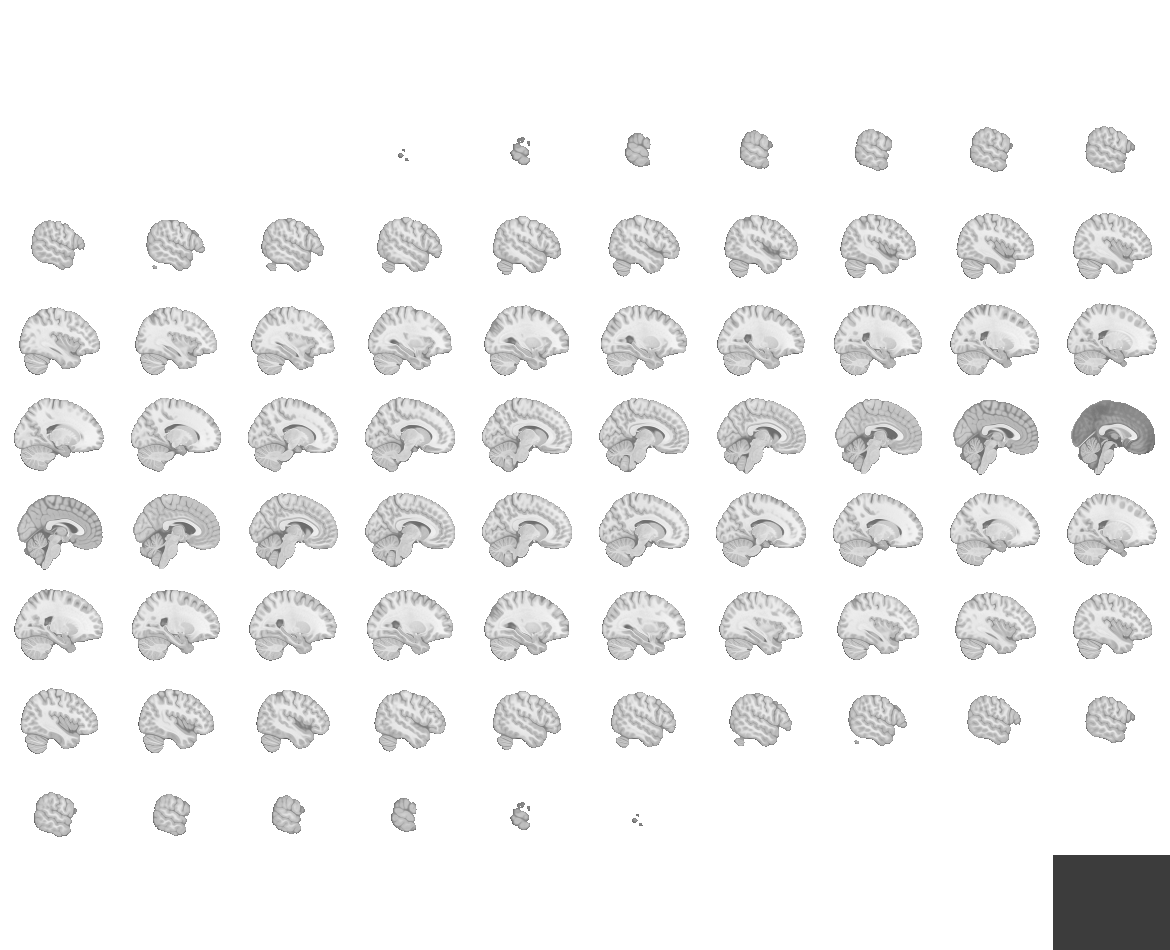
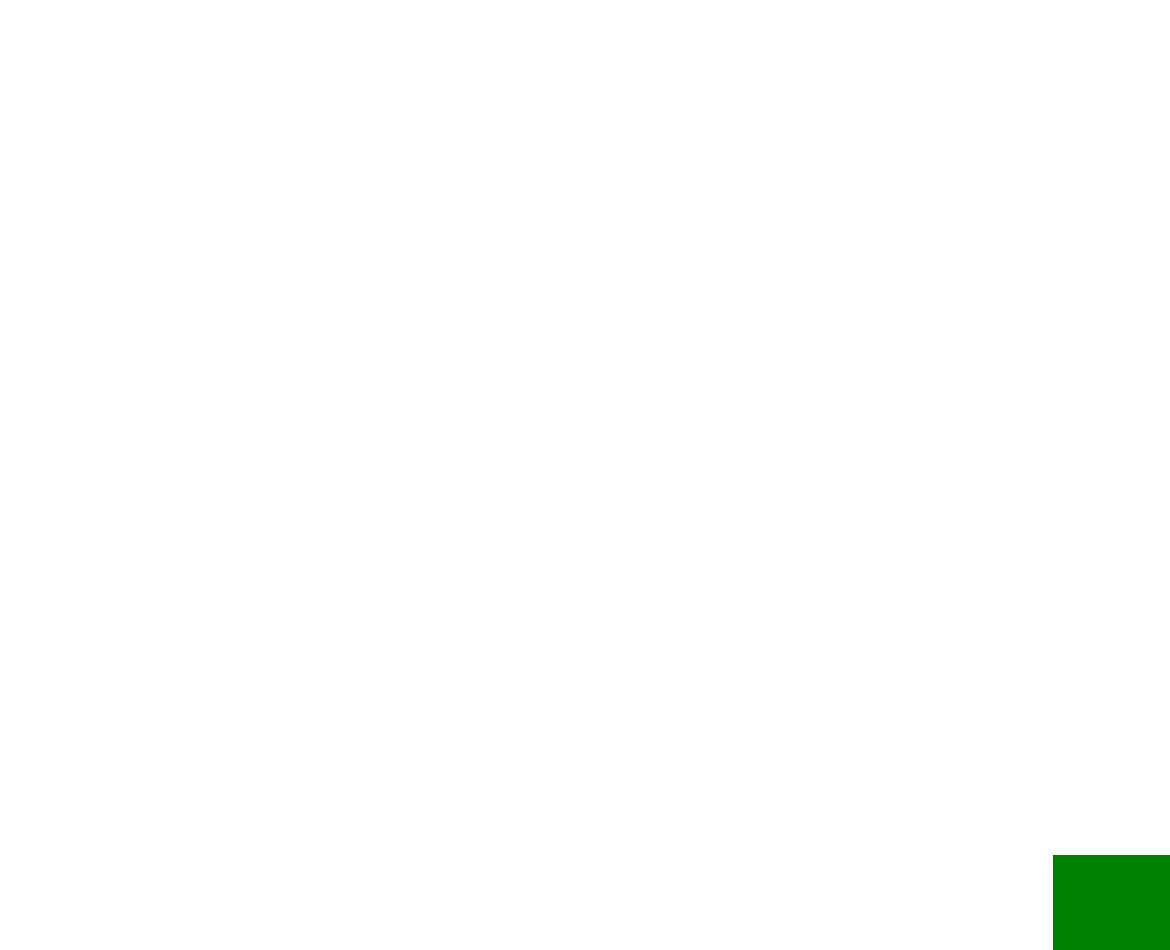

In [34]:
calvin_fwe.corrected_img

Visualize the P-Values (FWE Corrected) Used to Correct the Above


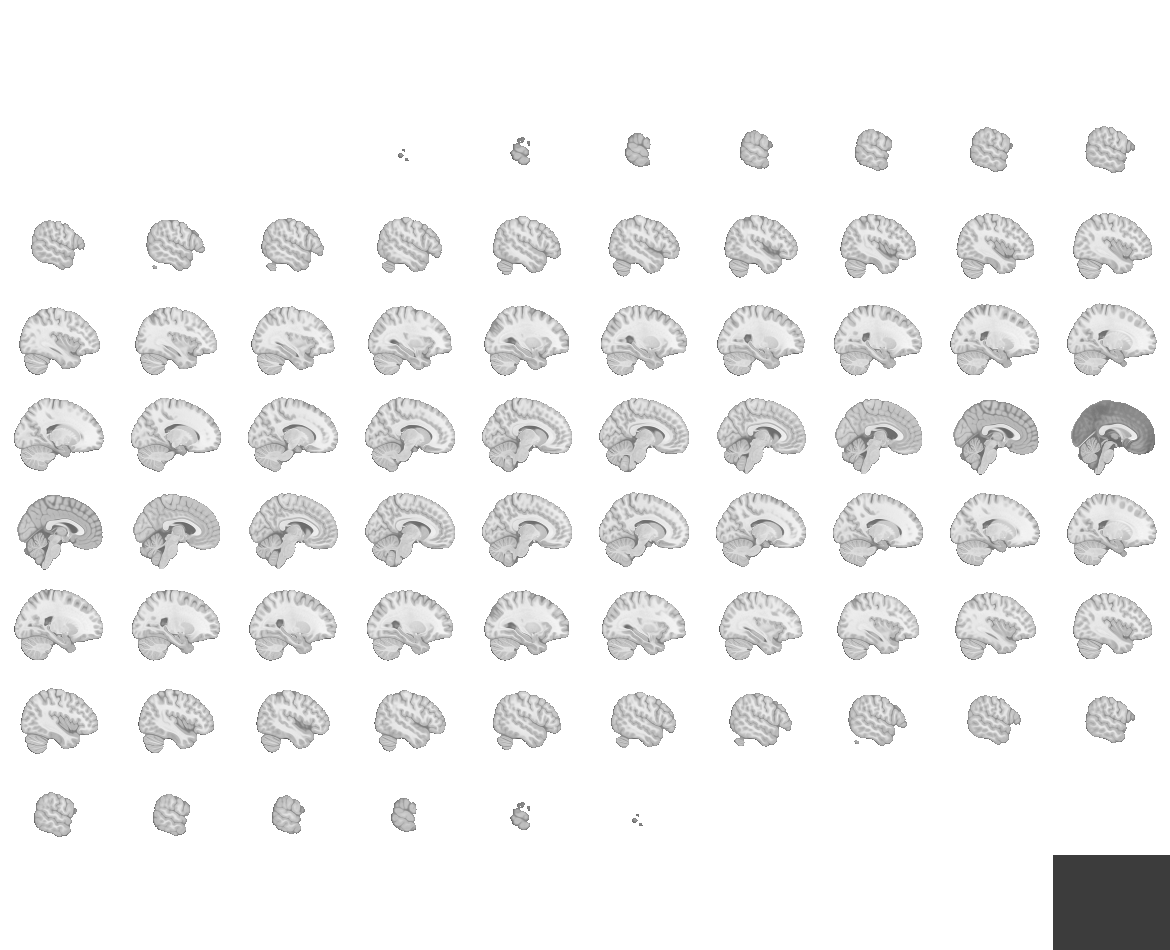
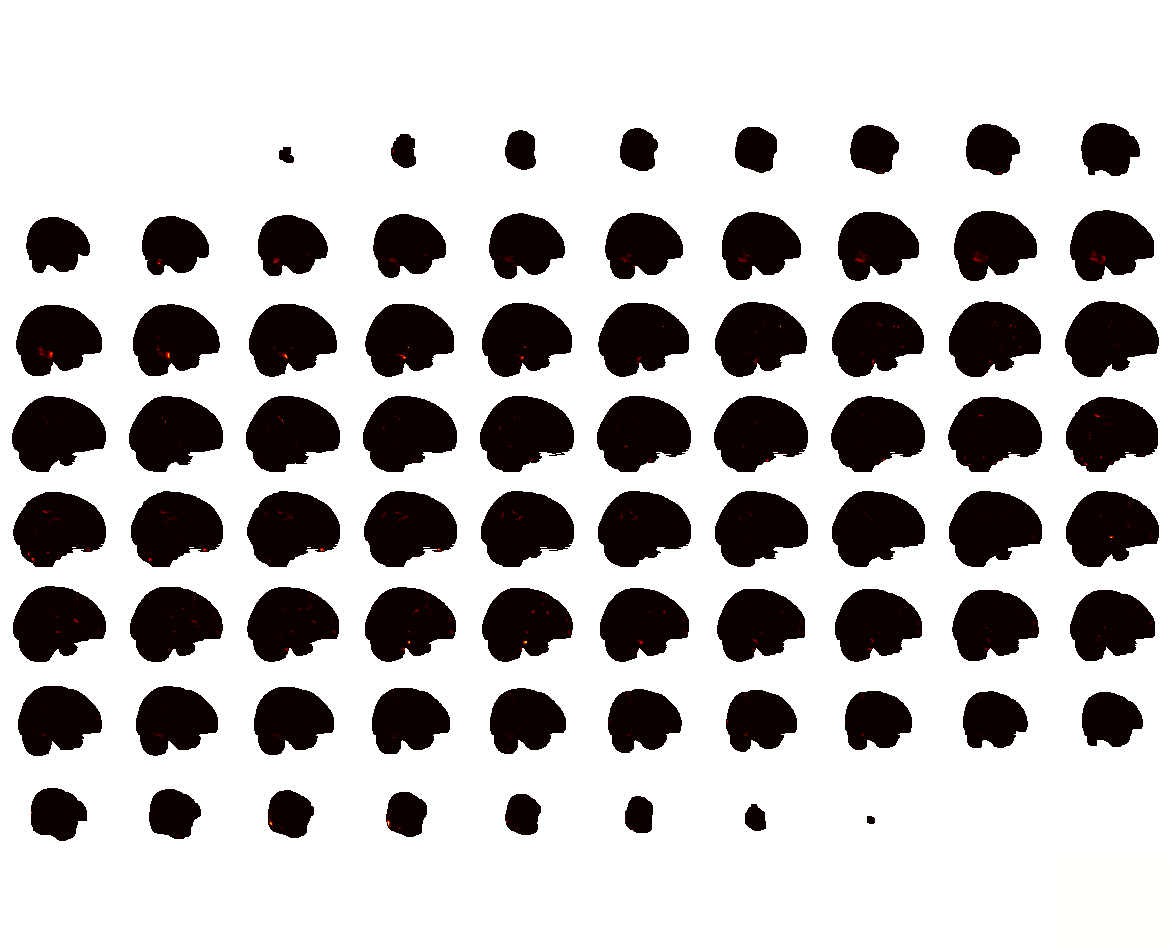

In [35]:
calvin_fwe.p_img

Visualize the Uncorrected Image


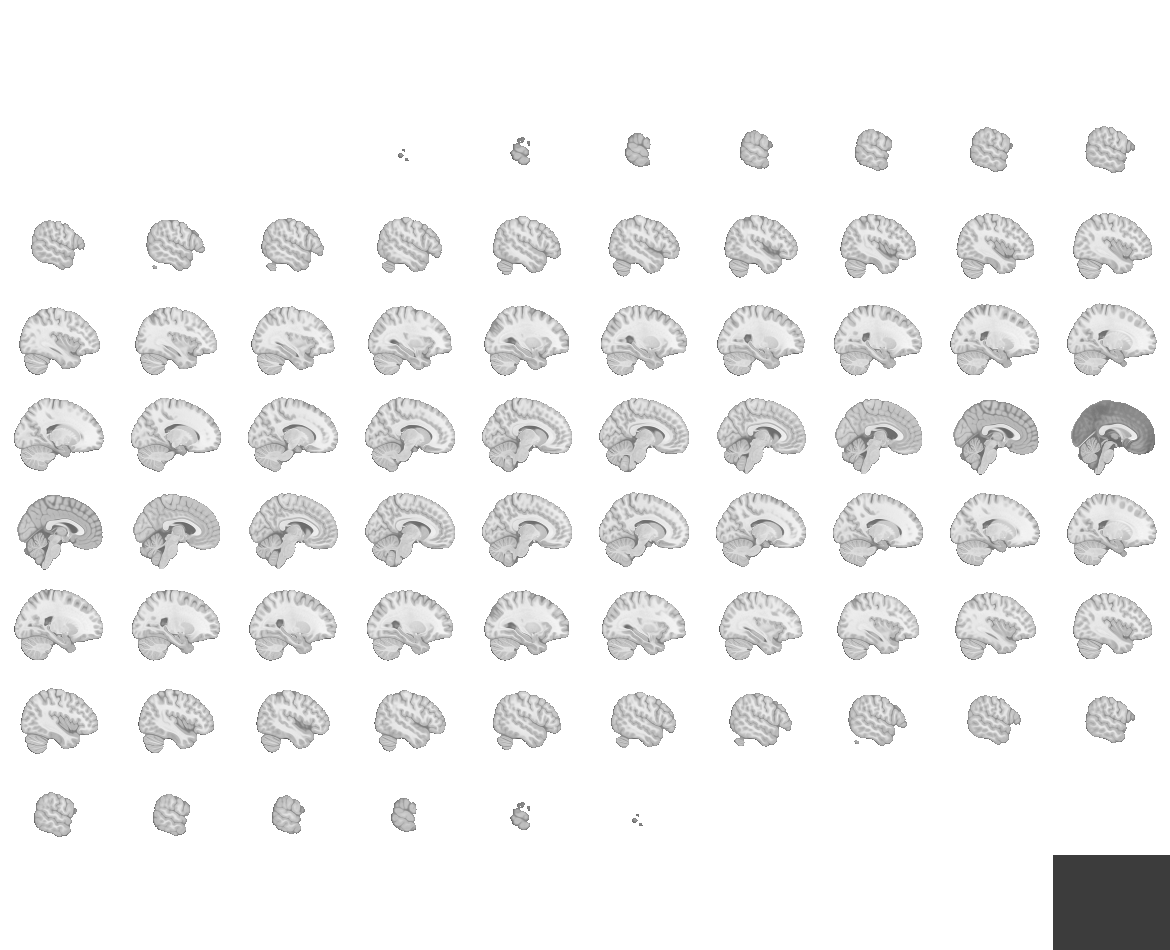
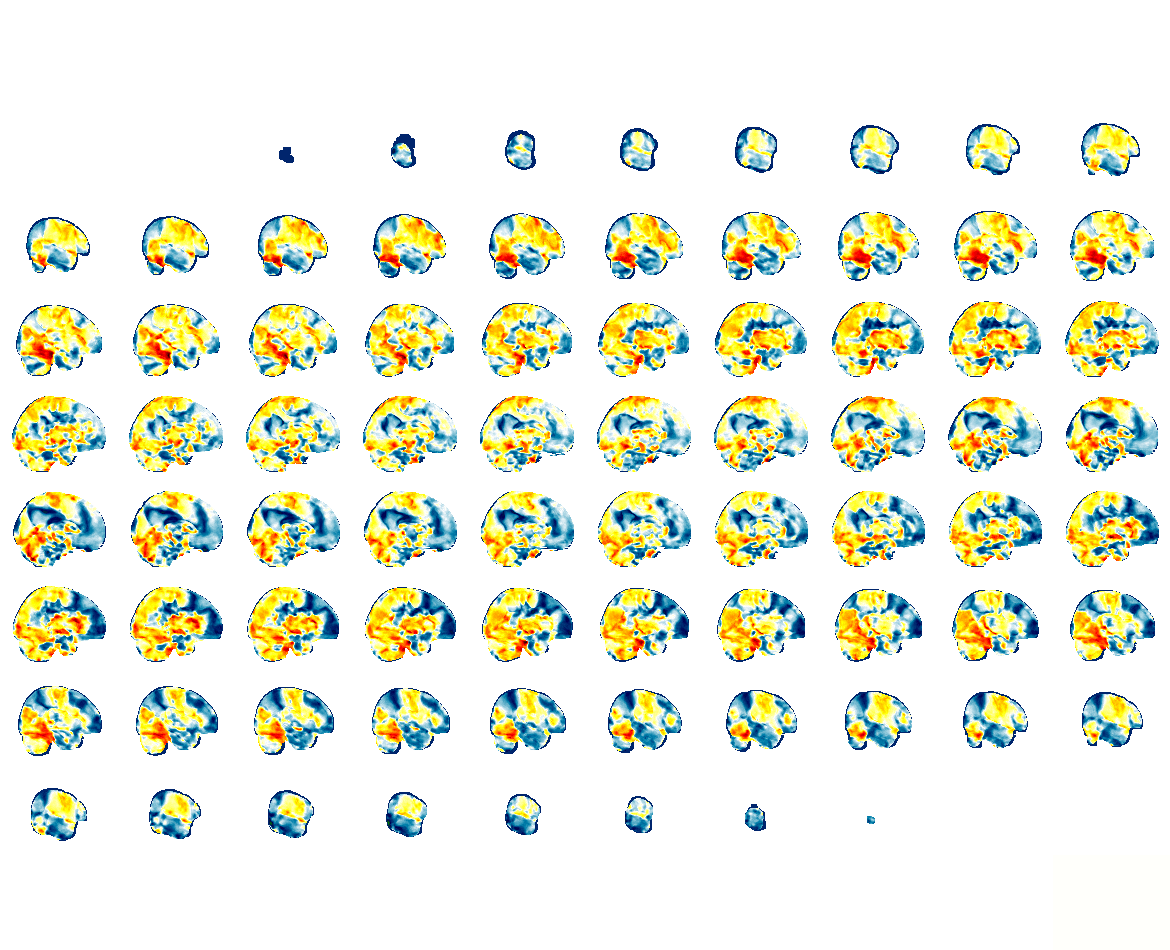

In [36]:
calvin_fwe.uncorrected_img